In [1]:
from keras.layers import Input, Dense
from keras.models import Model

## auto encoder 간단 설계
# encoder representations size
encoding_dim = 32 # 32floats

# this is out input placeholder
input_img = Input(shape=(784,))

# encoder is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# decoder is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# encoder
encoder = Model(input_img,encoded)

# decoder model
# create a placeholder for an encoded (32-dimesional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

# 학습 설정
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')


C:\Users\HyunA\AppData\Local\conda\conda\envs\tutorial\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

# mnist digit 데이터 업로드
from keras.datasets import mnist
import numpy as np

(x_train,_),(x_test,_) = mnist.load_data()

# 0-1 사이 값으로 정규화
x_train= x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# print(x_train.shape[1:]) # 이미지 한장의 사이즈 28,28
# print(np.prod(x_train.shape[1:])) # 이미지 한 장의 픽셀을 28*28 에서 784 로 변경

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))
# print(x_train.shape) # (60000,28,28) > (60000,784)로 변경됨


In [3]:

# 오토인코더 학습
autoencoder.fit(x_train,x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test))


# encode and decode some digits
# note that we take them from the test set

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50


  256/60000 [..............................] - ETA: 1:03 - loss: 0.6949

  768/60000 [..............................] - ETA: 25s - loss: 0.6940 

 1280/60000 [..............................] - ETA: 17s - loss: 0.6932

 2048/60000 [>.............................] - ETA: 12s - loss: 0.6920

 2816/60000 [>.............................] - ETA: 10s - loss: 0.6908

 3584/60000 [>.............................] - ETA: 8s - loss: 0.6893 

 4352/60000 [=>............................] - ETA: 7s - loss: 0.6877

 5120/60000 [=>............................] - ETA: 7s - loss: 0.6856

 5888/60000 [=>............................] - ETA: 6s - loss: 0.6830

 6656/60000 [==>...........................] - ETA: 6s - loss: 0.6797

 7424/60000 [==>...........................] - ETA: 5s - loss: 0.6755

 7936/60000 [==>...........................] - ETA: 5s - loss: 0.6722

 8704/60000 [===>..........................] - ETA: 5s - loss: 0.6661

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.6637

 9728/60000 [===>..........................] - ETA: 5s - loss: 0.6559

10496/60000 [====>.........................] - ETA: 5s - loss: 0.6468

11264/60000 [====>.........................] - ETA: 5s - loss: 0.6364

12032/60000 [=====>........................] - ETA: 4s - loss: 0.6252

12544/60000 [=====>........................] - ETA: 4s - loss: 0.6172

13056/60000 [=====>........................] - ETA: 4s - loss: 0.6093

13568/60000 [=====>........................] - ETA: 4s - loss: 0.6012

14336/60000 [======>.......................] - ETA: 4s - loss: 0.5890

15104/60000 [======>.......................] - ETA: 4s - loss: 0.5771

15616/60000 [======>.......................] - ETA: 4s - loss: 0.5695

16128/60000 [=======>......................] - ETA: 4s - loss: 0.5620

16896/60000 [=======>......................] - ETA: 4s - loss: 0.5514

17664/60000 [=======>......................] - ETA: 4s - loss: 0.5413

18432/60000 [========>.....................] - ETA: 4s - loss: 0.5318

19200/60000 [========>.....................] - ETA: 3s - loss: 0.5231

20224/60000 [=========>....................] - ETA: 3s - loss: 0.5121

21248/60000 [=========>....................] - ETA: 3s - loss: 0.5018

22016/60000 [==========>...................] - ETA: 3s - loss: 0.4946

22528/60000 [==========>...................] - ETA: 3s - loss: 0.4900

23040/60000 [==========>...................] - ETA: 3s - loss: 0.4856

23808/60000 [==========>...................] - ETA: 3s - loss: 0.4793

24576/60000 [===========>..................] - ETA: 3s - loss: 0.4734

25344/60000 [===========>..................] - ETA: 3s - loss: 0.4679

26112/60000 [============>.................] - ETA: 3s - loss: 0.4625

26624/60000 [============>.................] - ETA: 3s - loss: 0.4590

27136/60000 [============>.................] - ETA: 3s - loss: 0.4558

27904/60000 [============>.................] - ETA: 2s - loss: 0.4511

28672/60000 [=============>................] - ETA: 2s - loss: 0.4466

29440/60000 [=============>................] - ETA: 2s - loss: 0.4424

30208/60000 [==============>...............] - ETA: 2s - loss: 0.4383

30976/60000 [==============>...............] - ETA: 2s - loss: 0.4344

31744/60000 [==============>...............] - ETA: 2s - loss: 0.4306

32512/60000 [===============>..............] - ETA: 2s - loss: 0.4271

33280/60000 [===============>..............] - ETA: 2s - loss: 0.4237

34048/60000 [================>.............] - ETA: 2s - loss: 0.4205

34816/60000 [================>.............] - ETA: 2s - loss: 0.4174

35584/60000 [================>.............] - ETA: 2s - loss: 0.4143

36352/60000 [=================>............] - ETA: 2s - loss: 0.4114

37120/60000 [=================>............] - ETA: 2s - loss: 0.4087

37888/60000 [=================>............] - ETA: 1s - loss: 0.4059

38656/60000 [==================>...........] - ETA: 1s - loss: 0.4034

39168/60000 [==================>...........] - ETA: 1s - loss: 0.4017

39680/60000 [==================>...........] - ETA: 1s - loss: 0.4001

40192/60000 [===================>..........] - ETA: 1s - loss: 0.3985

40704/60000 [===================>..........] - ETA: 1s - loss: 0.3970

41472/60000 [===================>..........] - ETA: 1s - loss: 0.3947

42240/60000 [====================>.........] - ETA: 1s - loss: 0.3926

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3905

43776/60000 [====================>.........] - ETA: 1s - loss: 0.3885

44544/60000 [=====================>........] - ETA: 1s - loss: 0.3865

45568/60000 [=====================>........] - ETA: 1s - loss: 0.3841

46336/60000 [======================>.......] - ETA: 1s - loss: 0.3823

47360/60000 [======================>.......] - ETA: 1s - loss: 0.3800

48128/60000 [=======================>......] - ETA: 1s - loss: 0.3784

48896/60000 [=======================>......] - ETA: 0s - loss: 0.3767

49664/60000 [=======================>......] - ETA: 0s - loss: 0.3752

50432/60000 [========================>.....] - ETA: 0s - loss: 0.3737

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3722

51968/60000 [========================>.....] - ETA: 0s - loss: 0.3708

52736/60000 [=========================>....] - ETA: 0s - loss: 0.3694

53504/60000 [=========================>....] - ETA: 0s - loss: 0.3680

54272/60000 [==========================>...] - ETA: 0s - loss: 0.3667

54784/60000 [==========================>...] - ETA: 0s - loss: 0.3658

55552/60000 [==========================>...] - ETA: 0s - loss: 0.3646

56320/60000 [===========================>..] - ETA: 0s - loss: 0.3633

57088/60000 [===========================>..] - ETA: 0s - loss: 0.3621

57600/60000 [===========================>..] - ETA: 0s - loss: 0.3613

58368/60000 [============================>.] - ETA: 0s - loss: 0.3601

59136/60000 [============================>.] - ETA: 0s - loss: 0.3590

60000/60000 [==============================] - 5s 87us/step - loss: 0.3577 - val_loss: 0.2712


Epoch 2/50
  256/60000 [..............................] - ETA: 7s - loss: 0.2669

 1024/60000 [..............................] - ETA: 5s - loss: 0.2698

 1792/60000 [..............................] - ETA: 4s - loss: 0.2722

 2304/60000 [>.............................] - ETA: 4s - loss: 0.2725

 3072/60000 [>.............................] - ETA: 4s - loss: 0.2724

 3840/60000 [>.............................] - ETA: 4s - loss: 0.2720

 4608/60000 [=>............................] - ETA: 4s - loss: 0.2723

 5376/60000 [=>............................] - ETA: 4s - loss: 0.2724

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.2727

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.2723

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.2720

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.2716

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.2713

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2713

11520/60000 [====>.........................] - ETA: 3s - loss: 0.2710

12288/60000 [=====>........................] - ETA: 3s - loss: 0.2711

13312/60000 [=====>........................] - ETA: 3s - loss: 0.2708

14080/60000 [======>.......................] - ETA: 3s - loss: 0.2706

14848/60000 [======>.......................] - ETA: 3s - loss: 0.2707

15616/60000 [======>.......................] - ETA: 3s - loss: 0.2706

16640/60000 [=======>......................] - ETA: 3s - loss: 0.2705

17664/60000 [=======>......................] - ETA: 3s - loss: 0.2702

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2702

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2700

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2698

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2699

22272/60000 [==========>...................] - ETA: 2s - loss: 0.2698

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2696

23296/60000 [==========>...................] - ETA: 2s - loss: 0.2695

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2693

24576/60000 [===========>..................] - ETA: 2s - loss: 0.2693

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2692

25600/60000 [===========>..................] - ETA: 2s - loss: 0.2691

26112/60000 [============>.................] - ETA: 2s - loss: 0.2690

26880/60000 [============>.................] - ETA: 2s - loss: 0.2690

27648/60000 [============>.................] - ETA: 2s - loss: 0.2689

28160/60000 [=============>................] - ETA: 2s - loss: 0.2688

28416/60000 [=============>................] - ETA: 2s - loss: 0.2688

28672/60000 [=============>................] - ETA: 2s - loss: 0.2688



28928/60000 [=============>................] - ETA: 2s - loss: 0.2688

29184/60000 [=============>................] - ETA: 2s - loss: 0.2687

29440/60000 [=============>................] - ETA: 2s - loss: 0.2687

29952/60000 [=============>................] - ETA: 2s - loss: 0.2686

30464/60000 [==============>...............] - ETA: 2s - loss: 0.2686

30976/60000 [==============>...............]

 - ETA: 2s - loss: 0.2685

31488/60000 [==============>...............] - ETA: 2s - loss: 0.2684

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2684

32512/60000 [===============>..............] - ETA: 2s - loss: 0.2683

33024/60000 [===============>..............] - ETA: 2s - loss: 0.2682

33792/60000 [===============>..............] - ETA: 2s - loss: 0.2682

34304/60000 [================>.............] - ETA: 2s - loss: 0.2680

34816/60000 [================>.............] - ETA: 2s - loss: 0.2679

35840/60000 [================>.............] - ETA: 2s - loss: 0.2677

36864/60000 [=================>............] - ETA: 2s - loss: 0.2676

37632/60000 [=================>............] - ETA: 2s - loss: 0.2675

38656/60000 [==================>...........] - ETA: 2s - loss: 0.2674

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2674

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2674

40960/60000 [===================>..........] - ETA: 1s - loss: 0.2671

41728/60000 [===================>..........] - ETA: 1s - loss: 0.2670

42496/60000 [====================>.........] - ETA: 1s - loss: 0.2669

43264/60000 [====================>.........] - ETA: 1s - loss: 0.2667

44032/60000 [=====================>........] - ETA: 1s - loss: 0.2666

44800/60000 [=====================>........] - ETA: 1s - loss: 0.2665

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2663

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2662

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2660

48640/60000 [=======================>......] - ETA: 1s - loss: 0.2659

49664/60000 [=======================>......] - ETA: 0s - loss: 0.2657

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2656

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2654

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2653

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2651

54272/60000 [==========================>...] - ETA: 0s - loss: 0.2650

55040/60000 [==========================>...] - ETA: 0s - loss: 0.2649

55808/60000 [==========================>...] - ETA: 0s - loss: 0.2648

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2647

57344/60000 [===========================>..] - ETA: 0s - loss: 0.2646

58112/60000 [============================>.] - ETA: 0s - loss: 0.2644

58880/60000 [============================>.] - ETA: 0s - loss: 0.2643

59904/60000 [============================>.] - ETA: 0s - loss: 0.2641

60000/60000 [==============================] - 5s 89us/step - loss: 0.2640 - val_loss: 0.2535


Epoch 3/50
  256/60000 [..............................] - ETA: 7s - loss: 0.2569

 1024/60000 [..............................] - ETA: 5s - loss: 0.2565

 1792/60000 [..............................] - ETA: 5s - loss: 0.2549

 2560/60000 [>.............................] - ETA: 4s - loss: 0.2542

 3584/60000 [>.............................] - ETA: 4s - loss: 0.2536

 4608/60000 [=>............................] - ETA: 4s - loss: 0.2535

 5632/60000 [=>............................] - ETA: 3s - loss: 0.2533

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.2533

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.2532

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.2527

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.2527

10752/60000 [====>.........................] - ETA: 3s - loss: 0.2526

11776/60000 [====>.........................] - ETA: 2s - loss: 0.2524

12800/60000 [=====>........................] - ETA: 2s - loss: 0.2522

13824/60000 [=====>........................] - ETA: 2s - loss: 0.2520

14848/60000 [======>.......................] - ETA: 2s - loss: 0.2516

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2514

16896/60000 [=======>......................] - ETA: 2s - loss: 0.2512

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2510

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2509

19968/60000 [========>.....................] - ETA: 2s - loss: 0.2508

20992/60000 [=========>....................] - ETA: 2s - loss: 0.2509

22016/60000 [==========>...................] - ETA: 2s - loss: 0.2507

23040/60000 [==========>...................] - ETA: 2s - loss: 0.2506

24064/60000 [===========>..................] - ETA: 2s - loss: 0.2503

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2502

26112/60000 [============>.................] - ETA: 2s - loss: 0.2500

27136/60000 [============>.................] - ETA: 1s - loss: 0.2498

28160/60000 [=============>................] - ETA: 1s - loss: 0.2497

29184/60000 [=============>................] - ETA: 1s - loss: 0.2493

30208/60000 [==============>...............] - ETA: 1s - loss: 0.2490

31232/60000 [==============>...............] - ETA: 1s - loss: 0.2488

32256/60000 [===============>..............] - ETA: 1s - loss: 0.2486

33280/60000 [===============>..............] - ETA: 1s - loss: 0.2484

34304/60000 [================>.............] - ETA: 1s - loss: 0.2482

35328/60000 [================>.............] - ETA: 1s - loss: 0.2480

36352/60000 [=================>............] - ETA: 1s - loss: 0.2478

37376/60000 [=================>............] - ETA: 1s - loss: 0.2476

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2474

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2473

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2471

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2469

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2467

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2465

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2463

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2461

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2459

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2458

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2456

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2454

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2452

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2450

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2448

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2446

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2444

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2443

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2440

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2439

58624/60000 [============================>.] - ETA: 0s - loss: 0.2437

59648/60000 [============================>.] - ETA: 0s - loss: 0.2435

60000/60000 [==============================] - 4s 61us/step - loss: 0.2434 - val_loss: 0.2306


Epoch 4/50
  256/60000 [..............................] - ETA: 3s - loss: 0.2332

 1280/60000 [..............................] - ETA: 3s - loss: 0.2325

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2319

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2321

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2318

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2309

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.2308

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2305

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2303

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2301

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2300

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2300

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2298

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2298

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2297

15616/60000 [======>.......................] - ETA: 2s - loss: 0.2295

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2292

17664/60000 [=======>......................] - ETA: 2s - loss: 0.2292

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2289

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2288

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2287

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2285

22784/60000 [==========>...................] - ETA: 2s - loss: 0.2283

23808/60000 [==========>...................] - ETA: 1s - loss: 0.2280

24832/60000 [===========>..................] - ETA: 1s - loss: 0.2277

25856/60000 [===========>..................] - ETA: 1s - loss: 0.2275

26880/60000 [============>.................] - ETA: 1s - loss: 0.2274

27904/60000 [============>.................] - ETA: 1s - loss: 0.2273

28928/60000 [=============>................] - ETA: 1s - loss: 0.2271

29952/60000 [=============>................] - ETA: 1s - loss: 0.2270

30976/60000 [==============>...............] - ETA: 1s - loss: 0.2269

32000/60000 [===============>..............] - ETA: 1s - loss: 0.2268

33024/60000 [===============>..............] - ETA: 1s - loss: 0.2265

34048/60000 [================>.............] - ETA: 1s - loss: 0.2264

35072/60000 [================>.............] - ETA: 1s - loss: 0.2263

36096/60000 [=================>............] - ETA: 1s - loss: 0.2261

37120/60000 [=================>............] - ETA: 1s - loss: 0.2259

38144/60000 [==================>...........] - ETA: 1s - loss: 0.2256

39168/60000 [==================>...........] - ETA: 1s - loss: 0.2254

40192/60000 [===================>..........] - ETA: 1s - loss: 0.2252

41216/60000 [===================>..........] - ETA: 1s - loss: 0.2250

42240/60000 [====================>.........] - ETA: 0s - loss: 0.2248

43264/60000 [====================>.........] - ETA: 0s - loss: 0.2247

44288/60000 [=====================>........] - ETA: 0s - loss: 0.2245

45312/60000 [=====================>........] - ETA: 0s - loss: 0.2244

46336/60000 [======================>.......] - ETA: 0s - loss: 0.2243

47360/60000 [======================>.......] - ETA: 0s - loss: 0.2241

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2239

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2237

50432/60000 [========================>.....] - ETA: 0s - loss: 0.2236

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2235

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2233

53504/60000 [=========================>....] - ETA: 0s - loss: 0.2231

54528/60000 [==========================>...] - ETA: 0s - loss: 0.2229

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2228

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2226

57600/60000 [===========================>..] - ETA: 0s - loss: 0.2225

58624/60000 [============================>.] - ETA: 0s - loss: 0.2224

59648/60000 [============================>.] - ETA: 0s - loss: 0.2222

60000/60000 [==============================] - 4s 59us/step - loss: 0.2222 - val_loss: 0.2115


Epoch 5/50
  256/60000 [..............................] - ETA: 4s - loss: 0.2117

 1280/60000 [..............................] - ETA: 3s - loss: 0.2121

 2304/60000 [>.............................] - ETA: 3s - loss: 0.2125

 3328/60000 [>.............................] - ETA: 3s - loss: 0.2125

 4352/60000 [=>............................] - ETA: 3s - loss: 0.2118

 5376/60000 [=>............................] - ETA: 3s - loss: 0.2118

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.2115

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.2115

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.2116

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.2116

10496/60000 [====>.........................] - ETA: 2s - loss: 0.2115

11520/60000 [====>.........................] - ETA: 2s - loss: 0.2114

12544/60000 [=====>........................] - ETA: 2s - loss: 0.2112

13568/60000 [=====>........................] - ETA: 2s - loss: 0.2113

14592/60000 [======>.......................] - ETA: 2s - loss: 0.2111

15360/60000 [======>.......................] - ETA: 2s - loss: 0.2110

15872/60000 [======>.......................] - ETA: 2s - loss: 0.2111

16640/60000 [=======>......................] - ETA: 2s - loss: 0.2111

17152/60000 [=======>......................] - ETA: 2s - loss: 0.2109

17920/60000 [=======>......................] - ETA: 2s - loss: 0.2110

18688/60000 [========>.....................] - ETA: 2s - loss: 0.2108

18944/60000 [========>.....................] - ETA: 2s - loss: 0.2108

19712/60000 [========>.....................] - ETA: 2s - loss: 0.2108

20736/60000 [=========>....................] - ETA: 2s - loss: 0.2108

21248/60000 [=========>....................] - ETA: 2s - loss: 0.2107

21760/60000 [=========>....................] - ETA: 2s - loss: 0.2106

22016/60000 [==========>...................] - ETA: 3s - loss: 0.2105

22272/60000 [==========>...................] - ETA: 3s - loss: 0.2105

22784/60000 [==========>...................] - ETA: 3s - loss: 0.2105

23040/60000 [==========>...................] - ETA: 3s - loss: 0.2104



23808/60000 [==========>...................] - ETA: 3s - loss: 0.2103

24576/60000 [===========>..................] - ETA: 3s - loss: 0.2103

25088/60000 [===========>..................] - ETA: 2s - loss: 0.2103

25856/60000 [===========>..................] - ETA: 2s - loss: 0.2102

26624/60000 [============>.................] - ETA: 2s - loss: 0.2101

27392/60000 [============>.................] - ETA: 2s - loss: 0.2100

27904/60000 [============>.................] - ETA: 2s - loss: 0.2099

28672/60000 [=============>................] - ETA: 2s - loss: 0.2097

29440/60000 [=============>................] - ETA: 2s - loss: 0.2097

30464/60000 [==============>...............] - ETA: 2s - loss: 0.2094

31232/60000 [==============>...............] - ETA: 2s - loss: 0.2093

32000/60000 [===============>..............] - ETA: 2s - loss: 0.2091

33024/60000 [===============>..............] - ETA: 2s - loss: 0.2092

33792/60000 [===============>..............] - ETA: 2s - loss: 0.2091

34560/60000 [================>.............] - ETA: 2s - loss: 0.2091

35328/60000 [================>.............] - ETA: 2s - loss: 0.2091

36096/60000 [=================>............] - ETA: 2s - loss: 0.2089

36864/60000 [=================>............] - ETA: 1s - loss: 0.2088

37632/60000 [=================>............] - ETA: 1s - loss: 0.2087

38400/60000 [==================>...........] - ETA: 1s - loss: 0.2086

38912/60000 [==================>...........] - ETA: 1s - loss: 0.2085

39936/60000 [==================>...........] - ETA: 1s - loss: 0.2084

40704/60000 [===================>..........] - ETA: 1s - loss: 0.2083

41472/60000 [===================>..........] - ETA: 1s - loss: 0.2082

42240/60000 [====================>.........] - ETA: 1s - loss: 0.2081

43008/60000 [====================>.........] - ETA: 1s - loss: 0.2079

43776/60000 [====================>.........] - ETA: 1s - loss: 0.2079

44544/60000 [=====================>........] - ETA: 1s - loss: 0.2077



45312/60000 [=====================>........] - ETA: 1s - loss: 0.2077



45568/60000 [=====================>........] - ETA: 1s - loss: 0.2076

46080/60000 [======================>.......] - ETA: 1s - loss: 0.2076

46592/60000 [======================>.......] - ETA: 1s - loss: 0.2075

47104/60000 [======================>.......] - ETA: 1s - loss: 0.2074

47616/60000 [======================>.......] - ETA: 1s - loss: 0.2074

48384/60000 [=======================>......] - ETA: 0s - loss: 0.2073

48896/60000 [=======================>......] - ETA: 0s - loss: 0.2073

49408/60000 [=======================>......] - ETA: 0s - loss: 0.2073

49920/60000 [=======================>......] - ETA: 0s - loss: 0.2072

50176/60000 [========================>.....] - ETA: 0s - loss: 0.2071

50944/60000 [========================>.....] - ETA: 0s - loss: 0.2071

51456/60000 [========================>.....] - ETA: 0s - loss: 0.2071

51968/60000 [========================>.....] - ETA: 0s - loss: 0.2070

52480/60000 [=========================>....] - ETA: 0s - loss: 0.2070

53248/60000 [=========================>....] - ETA: 0s - loss: 0.2069

54016/60000 [==========================>...] - ETA: 0s - loss: 0.2068

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2067

55296/60000 [==========================>...] - ETA: 0s - loss: 0.2066

56064/60000 [===========================>..] - ETA: 0s - loss: 0.2066

56576/60000 [===========================>..] - ETA: 0s - loss: 0.2065

57088/60000 [===========================>..] - ETA: 0s - loss: 0.2065

57856/60000 [===========================>..] - ETA: 0s - loss: 0.2064

58624/60000 [============================>.] - ETA: 0s - loss: 0.2063

59136/60000 [============================>.] - ETA: 0s - loss: 0.2063

59392/60000 [============================>.] - ETA: 0s - loss: 0.2063

59904/60000 [============================>.] - ETA: 0s - loss: 0.2062

60000/60000 [==============================] - 6s 101us/step - loss: 0.2062 - val_loss: 0.1985


Epoch 6/50
  256/60000 [..............................] - ETA: 6s - loss: 0.1987

 1024/60000 [..............................] - ETA: 6s - loss: 0.1971

 1280/60000 [..............................] - ETA: 10s - loss: 0.1973

 1536/60000 [..............................] - ETA: 15s - loss: 0.1978

 2048/60000 [>.............................] - ETA: 13s - loss: 0.1981

 2560/60000 [>.............................] - ETA: 12s - loss: 0.1979

 3328/60000 [>.............................] - ETA: 10s - loss: 0.1985

 4096/60000 [=>............................] - ETA: 9s - loss: 0.1993 

 4864/60000 [=>............................] - ETA: 8s - loss: 0.1995

 5632/60000 [=>............................] - ETA: 7s - loss: 0.1991

 6400/60000 [==>...........................] - ETA: 7s - loss: 0.1992

 6912/60000 [==>...........................] - ETA: 6s - loss: 0.1991

 7680/60000 [==>...........................] - ETA: 6s - loss: 0.1993

 8192/60000 [===>..........................] - ETA: 6s - loss: 0.1993

 8960/60000 [===>..........................] - ETA: 7s - loss: 0.1992

 9216/60000 [===>..........................] - ETA: 7s - loss: 0.1991

 9472/60000 [===>..........................] - ETA: 7s - loss: 0.1990

 9984/60000 [===>..........................] - ETA: 7s - loss: 0.1990

10496/60000 [====>.........................] - ETA: 7s - loss: 0.1988

11008/60000 [====>.........................] - ETA: 7s - loss: 0.1985

11520/60000 [====>.........................] - ETA: 6s - loss: 0.1986

12032/60000 [=====>........................] - ETA: 6s - loss: 0.1986

12544/60000 [=====>........................] - ETA: 6s - loss: 0.1986

13056/60000 [=====>........................] - ETA: 6s - loss: 0.1985

13568/60000 [=====>........................] - ETA: 6s - loss: 0.1985

14080/60000 [======>.......................] - ETA: 6s - loss: 0.1985

14336/60000 [======>.......................] - ETA: 6s - loss: 0.1984

14592/60000 [======>.......................] - ETA: 6s - loss: 0.1984

14848/60000 [======>.......................] - ETA: 6s - loss: 0.1984

15360/60000 [======>.......................] - ETA: 6s - loss: 0.1984

15872/60000 [======>.......................] - ETA: 6s - loss: 0.1983

16384/60000 [=======>......................] - ETA: 6s - loss: 0.1982

16896/60000 [=======>......................] - ETA: 6s - loss: 0.1981

17152/60000 [=======>......................] - ETA: 6s - loss: 0.1982

17408/60000 [=======>......................] - ETA: 6s - loss: 0.1981

17664/60000 [=======>......................] - ETA: 6s - loss: 0.1981

17920/60000 [=======>......................] - ETA: 6s - loss: 0.1980

18176/60000 [========>.....................] - ETA: 6s - loss: 0.1980

18688/60000 [========>.....................] - ETA: 6s - loss: 0.1980

19200/60000 [========>.....................] - ETA: 6s - loss: 0.1980

19712/60000 [========>.....................] - ETA: 6s - loss: 0.1980

20480/60000 [=========>....................] - ETA: 6s - loss: 0.1980

21248/60000 [=========>....................] - ETA: 5s - loss: 0.1980

22272/60000 [==========>...................] - ETA: 5s - loss: 0.1978

23296/60000 [==========>...................] - ETA: 5s - loss: 0.1979

24064/60000 [===========>..................] - ETA: 5s - loss: 0.1978

24832/60000 [===========>..................] - ETA: 5s - loss: 0.1978

25600/60000 [===========>..................] - ETA: 4s - loss: 0.1978

26624/60000 [============>.................] - ETA: 4s - loss: 0.1978

27392/60000 [============>.................] - ETA: 4s - loss: 0.1978

28160/60000 [=============>................] - ETA: 4s - loss: 0.1977

28928/60000 [=============>................] - ETA: 4s - loss: 0.1976

29696/60000 [=============>................] - ETA: 3s - loss: 0.1975

30464/60000 [==============>...............] - ETA: 3s - loss: 0.1974

31488/60000 [==============>...............] - ETA: 3s - loss: 0.1974

32256/60000 [===============>..............] - ETA: 3s - loss: 0.1973

33280/60000 [===============>..............] - ETA: 3s - loss: 0.1973

34304/60000 [================>.............] - ETA: 3s - loss: 0.1972

35328/60000 [================>.............] - ETA: 2s - loss: 0.1971

36352/60000 [=================>............] - ETA: 2s - loss: 0.1971

36864/60000 [=================>............] - ETA: 2s - loss: 0.1970

37632/60000 [=================>............] - ETA: 2s - loss: 0.1969

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1969

39168/60000 [==================>...........] - ETA: 2s - loss: 0.1969

39936/60000 [==================>...........] - ETA: 2s - loss: 0.1969

40704/60000 [===================>..........] - ETA: 2s - loss: 0.1967

41472/60000 [===================>..........] - ETA: 2s - loss: 0.1967

41984/60000 [===================>..........] - ETA: 2s - loss: 0.1967

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1966

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1965

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1965

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1964

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1964

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1963

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1962

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1962

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1961

49408/60000 [=======================>......] - ETA: 1s - loss: 0.1961

50176/60000 [========================>.....] - ETA: 1s - loss: 0.1959

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1959

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1958

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1957

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1956

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1956

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1955

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1955

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1954

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1954

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1953

58368/60000 [============================>.] - ETA: 0s - loss: 0.1953

58880/60000 [============================>.] - ETA: 0s - loss: 0.1953

59904/60000 [============================>.] - ETA: 0s - loss: 0.1952

60000/60000 [==============================] - 6s 106us/step - loss: 0.1952 - val_loss: 0.1894


Epoch 7/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1839

 1280/60000 [..............................] - ETA: 3s - loss: 0.1898

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1919

 3072/60000 [>.............................] - ETA: 3s - loss: 0.1921

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1921

 5120/60000 [=>............................] - ETA: 3s - loss: 0.1923

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.1921

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1919

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.1917

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1915

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1911

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1909

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1908

12800/60000 [=====>........................] - ETA: 2s - loss: 0.1907

13824/60000 [=====>........................] - ETA: 2s - loss: 0.1907

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1907

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1905

16384/60000 [=======>......................] - ETA: 2s - loss: 0.1903

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1903

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1902

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1901

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1901

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1901

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1900

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1899

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1899

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1898

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1897

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1897

26880/60000 [============>.................] - ETA: 2s - loss: 0.1896

27904/60000 [============>.................] - ETA: 2s - loss: 0.1895

28928/60000 [=============>................] - ETA: 2s - loss: 0.1894

29952/60000 [=============>................] - ETA: 1s - loss: 0.1893

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1892

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1892

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1891

34048/60000 [================>.............] - ETA: 1s - loss: 0.1890

35072/60000 [================>.............] - ETA: 1s - loss: 0.1888

36096/60000 [=================>............] - ETA: 1s - loss: 0.1888

37120/60000 [=================>............] - ETA: 1s - loss: 0.1888

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1887

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1887

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1886

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1885

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1884

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1883

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1881

44544/60000 [=====================>........] - ETA: 0s - loss: 0.1881

45568/60000 [=====================>........] - ETA: 0s - loss: 0.1881

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1881

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1880

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1879

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1878

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1877

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1877

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1877

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1876

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1875

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1875

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1874

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1873

58624/60000 [============================>.] - ETA: 0s - loss: 0.1873

59648/60000 [============================>.] - ETA: 0s - loss: 0.1873

60000/60000 [==============================] - 4s 68us/step - loss: 0.1872 - val_loss: 0.1824


Epoch 8/50
  256/60000 [..............................] - ETA: 7s - loss: 0.1799

 1280/60000 [..............................] - ETA: 4s - loss: 0.1820

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1827

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1832

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1830

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1829

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1829

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.1830

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.1834

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1836

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1832

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1833

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1833

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1833

13312/60000 [=====>........................] - ETA: 2s - loss: 0.1832

14336/60000 [======>.......................] - ETA: 2s - loss: 0.1830

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1831

16384/60000 [=======>......................] - ETA: 2s - loss: 0.1831

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1832

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1830

19200/60000 [========>.....................] - ETA: 2s - loss: 0.1831

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1831

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1831

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1830

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1831



21760/60000 [=========>....................] - ETA: 2s - loss: 0.1831



22272/60000 [==========>...................] - ETA: 2s - loss: 0.1831

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1830



23296/60000 [==========>...................] - ETA: 2s - loss: 0.1830

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1831

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1831

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1829

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1829

26624/60000 [============>.................] - ETA: 2s - loss: 0.1829

27392/60000 [============>.................] - ETA: 2s - loss: 0.1828

28160/60000 [=============>................] - ETA: 2s - loss: 0.1828

28928/60000 [=============>................] - ETA: 2s - loss: 0.1828

29696/60000 [=============>................] - ETA: 2s - loss: 0.1828

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1827

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1827

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1826

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1826

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1825

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1825

34816/60000 [================>.............] - ETA: 2s - loss: 0.1824

35840/60000 [================>.............] - ETA: 1s - loss: 0.1823

36864/60000 [=================>............] - ETA: 1s - loss: 0.1822

37888/60000 [=================>............] - ETA: 1s - loss: 0.1822

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1821

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1821

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1821

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1820

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1820

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1819

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1818

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1817

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1817

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1817

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1816

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1816

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1815

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1814

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1814

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1813

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1813

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1813

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1812

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1811

58880/60000 [============================>.] - ETA: 0s - loss: 0.1810

59904/60000 [============================>.] - ETA: 0s - loss: 0.1810

60000/60000 [==============================] - 4s 74us/step - loss: 0.1809 - val_loss: 0.1768


Epoch 9/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1764

 1280/60000 [..............................] - ETA: 3s - loss: 0.1785

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1789

 2816/60000 [>.............................] - ETA: 3s - loss: 0.1787

 3584/60000 [>.............................] - ETA: 3s - loss: 0.1788

 4608/60000 [=>............................] - ETA: 3s - loss: 0.1785

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1785

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.1782

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.1780

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1778

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1779

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1779

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1778

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1777

13312/60000 [=====>........................] - ETA: 2s - loss: 0.1776

14336/60000 [======>.......................] - ETA: 2s - loss: 0.1775

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1775

16384/60000 [=======>......................] - ETA: 2s - loss: 0.1775

17408/60000 [=======>......................] - ETA: 2s - loss: 0.1777

18432/60000 [========>.....................] - ETA: 2s - loss: 0.1776

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1775

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1775

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1775

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1774

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1774

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1772

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1772

26624/60000 [============>.................] - ETA: 1s - loss: 0.1772

27648/60000 [============>.................] - ETA: 1s - loss: 0.1771

28672/60000 [=============>................] - ETA: 1s - loss: 0.1771

29696/60000 [=============>................] - ETA: 1s - loss: 0.1771

30720/60000 [==============>...............] - ETA: 1s - loss: 0.1771

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1770

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1769



33792/60000 [===============>..............] - ETA: 1s - loss: 0.1768

34560/60000 [================>.............] - ETA: 1s - loss: 0.1767

35072/60000 [================>.............] - ETA: 1s - loss: 0.1767

35840/60000 [================>.............] - ETA: 1s - loss: 0.1767

36352/60000 [=================>............] - ETA: 1s - loss: 0.1767

37120/60000 [=================>............] - ETA: 1s - loss: 0.1767

37888/60000 [=================>............] - ETA: 1s - loss: 0.1767

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1767

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1766



39936/60000 [==================>...........] - ETA: 1s - loss: 0.1766

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1765

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1765

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1765



41984/60000 [===================>..........] - ETA: 1s - loss: 0.1764

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1764

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1764

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1763

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1763

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1763



45312/60000 [=====================>........] - ETA: 1s - loss: 0.1763



45824/60000 [=====================>........] - ETA: 1s - loss: 0.1763

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1763

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1763

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1763

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1762

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1762

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1762

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1762

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1761

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1761

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1760

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1760

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1759

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1759

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1759

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1759

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1759

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1759

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1758

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1758

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1758

58368/60000 [============================>.] - ETA: 0s - loss: 0.1757

59136/60000 [============================>.] - ETA: 0s - loss: 0.1756

60000/60000 [==============================] - 5s 85us/step - loss: 0.1756 - val_loss: 0.1717


Epoch 10/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1736

 1280/60000 [..............................] - ETA: 3s - loss: 0.1730

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1738

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1734

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1737

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1735

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1735

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1730

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1728

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1729

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1730

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1733

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1732

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1730

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1728

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1725

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1723

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1722

15104/60000 [======>.......................] - ETA: 3s - loss: 0.1722

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1722

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1721

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1721

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1722

18944/60000 [========>.....................] - ETA: 2s - loss: 0.1722

19968/60000 [========>.....................] - ETA: 2s - loss: 0.1722

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1723

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1723

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1723

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1722

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1720

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1721

26112/60000 [============>.................] - ETA: 2s - loss: 0.1722

27136/60000 [============>.................] - ETA: 2s - loss: 0.1721

28160/60000 [=============>................] - ETA: 2s - loss: 0.1719

29184/60000 [=============>................] - ETA: 2s - loss: 0.1718

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1717

31232/60000 [==============>...............] - ETA: 1s - loss: 0.1717

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1717

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1717

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1717

34304/60000 [================>.............] - ETA: 1s - loss: 0.1716

35328/60000 [================>.............] - ETA: 1s - loss: 0.1716

36352/60000 [=================>............] - ETA: 1s - loss: 0.1716

37376/60000 [=================>............] - ETA: 1s - loss: 0.1716

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1716

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1716

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1716

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1716

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1715

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1715

44544/60000 [=====================>........] - ETA: 0s - loss: 0.1714

45568/60000 [=====================>........] - ETA: 0s - loss: 0.1714

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1714

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1713

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1712

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1712

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1712

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1712

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1711

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1711

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1711

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1710

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1710

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1710

58880/60000 [============================>.] - ETA: 0s - loss: 0.1709

59904/60000 [============================>.] - ETA: 0s - loss: 0.1709

60000/60000 [==============================] - 4s 65us/step - loss: 0.1709 - val_loss: 0.1672


Epoch 11/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1633

 1024/60000 [..............................] - ETA: 4s - loss: 0.1661

 1792/60000 [..............................] - ETA: 4s - loss: 0.1675

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1676

 3584/60000 [>.............................] - ETA: 3s - loss: 0.1684

 4608/60000 [=>............................] - ETA: 3s - loss: 0.1680

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1676

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.1674

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.1678

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1676

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1677

10752/60000 [====>.........................] - ETA: 2s - loss: 0.1675

11776/60000 [====>.........................] - ETA: 2s - loss: 0.1677

12800/60000 [=====>........................] - ETA: 2s - loss: 0.1677

13824/60000 [=====>........................] - ETA: 2s - loss: 0.1678

14848/60000 [======>.......................] - ETA: 2s - loss: 0.1677

15872/60000 [======>.......................] - ETA: 2s - loss: 0.1678

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1677

17408/60000 [=======>......................] - ETA: 2s - loss: 0.1678

18432/60000 [========>.....................] - ETA: 2s - loss: 0.1678

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1678

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1678

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1677

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1675

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1676

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1676

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1675

26368/60000 [============>.................] - ETA: 2s - loss: 0.1675

27392/60000 [============>.................] - ETA: 1s - loss: 0.1676

28416/60000 [=============>................] - ETA: 1s - loss: 0.1676

29440/60000 [=============>................] - ETA: 1s - loss: 0.1675

30208/60000 [==============>...............] - ETA: 1s - loss: 0.1675

31232/60000 [==============>...............] - ETA: 1s - loss: 0.1675

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1674

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1674

34048/60000 [================>.............] - ETA: 1s - loss: 0.1674

34816/60000 [================>.............] - ETA: 1s - loss: 0.1674

35840/60000 [================>.............] - ETA: 1s - loss: 0.1674

36608/60000 [=================>............] - ETA: 1s - loss: 0.1673

37632/60000 [=================>............] - ETA: 1s - loss: 0.1672

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1672

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1672

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1672

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1671

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1671

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1670

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1670

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1670

46080/60000 [======================>.......] - ETA: 0s - loss: 0.1669

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1669

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1669

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1669

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1668

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1668

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1668

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1668

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1668

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1667

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1667

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1666

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1665

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1666

58880/60000 [============================>.] - ETA: 0s - loss: 0.1665

59904/60000 [============================>.] - ETA: 0s - loss: 0.1665

60000/60000 [==============================] - 4s 66us/step - loss: 0.1665 - val_loss: 0.1630


Epoch 12/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1598

 1280/60000 [..............................] - ETA: 3s - loss: 0.1619

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1626

 3584/60000 [>.............................] - ETA: 2s - loss: 0.1628

 4608/60000 [=>............................] - ETA: 2s - loss: 0.1636

 5632/60000 [=>............................] - ETA: 2s - loss: 0.1633

 6912/60000 [==>...........................] - ETA: 2s - loss: 0.1635

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.1634

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.1634

10240/60000 [====>.........................] - ETA: 2s - loss: 0.1635

11264/60000 [====>.........................] - ETA: 2s - loss: 0.1634

12288/60000 [=====>........................] - ETA: 2s - loss: 0.1636

13312/60000 [=====>........................] - ETA: 2s - loss: 0.1635

14336/60000 [======>.......................] - ETA: 2s - loss: 0.1633

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1633

16384/60000 [=======>......................] - ETA: 2s - loss: 0.1633

17408/60000 [=======>......................] - ETA: 2s - loss: 0.1633

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1633

18944/60000 [========>.....................] - ETA: 2s - loss: 0.1632

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1633

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1631

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1630

22784/60000 [==========>...................] - ETA: 1s - loss: 0.1631

23808/60000 [==========>...................] - ETA: 1s - loss: 0.1630

24832/60000 [===========>..................] - ETA: 1s - loss: 0.1629

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1629

26880/60000 [============>.................] - ETA: 1s - loss: 0.1629

27904/60000 [============>.................] - ETA: 1s - loss: 0.1630

28928/60000 [=============>................] - ETA: 1s - loss: 0.1630

29952/60000 [=============>................] - ETA: 1s - loss: 0.1631

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1630

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1630

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1630

34048/60000 [================>.............] - ETA: 1s - loss: 0.1630

35072/60000 [================>.............] - ETA: 1s - loss: 0.1630

36096/60000 [=================>............] - ETA: 1s - loss: 0.1630

37120/60000 [=================>............] - ETA: 1s - loss: 0.1630

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1630

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1630

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1629

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1630

42240/60000 [====================>.........] - ETA: 0s - loss: 0.1630

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1630

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1629

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1629

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1629

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1628

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1628

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1627

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1627

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1627

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1626

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1626

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1626

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1625

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1625

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1624

58368/60000 [============================>.] - ETA: 0s - loss: 0.1624

59392/60000 [============================>.] - ETA: 0s - loss: 0.1624

60000/60000 [==============================] - 3s 58us/step - loss: 0.1623 - val_loss: 0.1589


Epoch 13/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1566

 1024/60000 [..............................] - ETA: 4s - loss: 0.1598

 1792/60000 [..............................] - ETA: 4s - loss: 0.1595

 2560/60000 [>.............................] - ETA: 4s - loss: 0.1589

 3328/60000 [>.............................] - ETA: 4s - loss: 0.1597

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1601

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1602

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1599

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1604

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1603

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.1600

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1600

10240/60000 [====>.........................]

 - ETA: 3s - loss: 0.1599

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1598

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1599

13312/60000 [=====>........................] - ETA: 3s - loss: 0.1598

14336/60000 [======>.......................] - ETA: 2s - loss: 0.1600

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1599

16384/60000 [=======>......................] - ETA: 2s - loss: 0.1599

17408/60000 [=======>......................] - ETA: 2s - loss: 0.1597

18432/60000 [========>.....................] - ETA: 2s - loss: 0.1597

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1597

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1597

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1597

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1597

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1597

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1597

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1596

26368/60000 [============>.................] - ETA: 2s - loss: 0.1595

27392/60000 [============>.................] - ETA: 2s - loss: 0.1595

28416/60000 [=============>................] - ETA: 1s - loss: 0.1595

29440/60000 [=============>................] - ETA: 1s - loss: 0.1594

30464/60000 [==============>...............] - ETA: 1s - loss: 0.1594

31488/60000 [==============>...............] - ETA: 1s - loss: 0.1593

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1594

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1593

34560/60000 [================>.............] - ETA: 1s - loss: 0.1593

35584/60000 [================>.............] - ETA: 1s - loss: 0.1593

36608/60000 [=================>............] - ETA: 1s - loss: 0.1593

37632/60000 [=================>............] - ETA: 1s - loss: 0.1592

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1591

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1591

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1591

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1590

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1590

43520/60000 [====================>.........] - ETA: 0s - loss: 0.1590

44544/60000 [=====================>........] - ETA: 0s - loss: 0.1590

45568/60000 [=====================>........] - ETA: 0s - loss: 0.1590

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1590

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1589

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1589

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1589

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1589

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1588

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1588

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1587

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1587

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1586

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1585

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1585

58624/60000 [============================>.] - ETA: 0s - loss: 0.1585

59648/60000 [============================>.] - ETA: 0s - loss: 0.1585

60000/60000 [==============================] - 4s 62us/step - loss: 0.1585 - val_loss: 0.1551


Epoch 14/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1562

 1280/60000 [..............................] - ETA: 3s - loss: 0.1562

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1567

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1566

 4352/60000 [=>............................] - ETA: 2s - loss: 0.1558

 5376/60000 [=>............................] - ETA: 2s - loss: 0.1559

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1563

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1562

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1561

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1558

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1561

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1561

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1562

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1561

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1561

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1561

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1560

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1560

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1560

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1560

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1559

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1558

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1559

23808/60000 [==========>...................] - ETA: 1s - loss: 0.1558

24832/60000 [===========>..................] - ETA: 1s - loss: 0.1558

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1558

26880/60000 [============>.................] - ETA: 1s - loss: 0.1558

27392/60000 [============>.................] - ETA: 1s - loss: 0.1558

27904/60000 [============>.................] - ETA: 1s - loss: 0.1558

28672/60000 [=============>................] - ETA: 1s - loss: 0.1558

29696/60000 [=============>................] - ETA: 1s - loss: 0.1557

30720/60000 [==============>...............] - ETA: 1s - loss: 0.1557

31488/60000 [==============>...............] - ETA: 1s - loss: 0.1556

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1557

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1556

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1556

34048/60000 [================>.............] - ETA: 1s - loss: 0.1555

35072/60000 [================>.............] - ETA: 1s - loss: 0.1555

35840/60000 [================>.............] - ETA: 1s - loss: 0.1555

36608/60000 [=================>............] - ETA: 1s - loss: 0.1553

37376/60000 [=================>............] - ETA: 1s - loss: 0.1553

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1553

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1553

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1552

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1552

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1551

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1551

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1551

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1551

45056/60000 [=====================>........] - ETA: 0s - loss: 0.1551

45824/60000 [=====================>........] - ETA: 0s - loss: 0.1551

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1551

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1551

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1551

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1551

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1550

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1550

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1551

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1550

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1550

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1550

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1550

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1549

58112/60000 [============================>.] - ETA: 0s - loss: 0.1549

58880/60000 [============================>.] - ETA: 0s - loss: 0.1549

59904/60000 [============================>.] - ETA: 0s - loss: 0.1548

60000/60000 [==============================] - 4s 66us/step - loss: 0.1548 - val_loss: 0.1517


Epoch 15/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1518

 1280/60000 [..............................] - ETA: 3s - loss: 0.1502

 2048/60000 [>.............................] - ETA: 3s - loss: 0.1511

 2816/60000 [>.............................] - ETA: 3s - loss: 0.1519

 3840/60000 [>.............................] - ETA: 3s - loss: 0.1519

 4608/60000 [=>............................] - ETA: 3s - loss: 0.1518

 5120/60000 [=>............................] - ETA: 3s - loss: 0.1520

 5888/60000 [=>............................] - ETA: 3s - loss: 0.1520



 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1522

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1521

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1518

 8192/60000 [===>..........................] - ETA: 4s - loss: 0.1520

 8704/60000 [===>..........................] - ETA: 4s - loss: 0.1519

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1520

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1522

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1523

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1523

11776/60000 [====>.........................] - ETA: 4s - loss: 0.1522

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1524

13312/60000 [=====>........................] - ETA: 4s - loss: 0.1522

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1523

14592/60000 [======>.......................] - ETA: 4s - loss: 0.1524

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1525

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1526

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1527

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1526

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1528

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1527

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1527

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1525

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1524

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1525

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1526

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1525

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1525

26624/60000 [============>.................] - ETA: 2s - loss: 0.1525

27648/60000 [============>.................] - ETA: 2s - loss: 0.1524

28672/60000 [=============>................] - ETA: 2s - loss: 0.1524

29696/60000 [=============>................] - ETA: 2s - loss: 0.1522

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1522

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1522

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1521

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1521

34816/60000 [================>.............] - ETA: 1s - loss: 0.1520

35840/60000 [================>.............] - ETA: 1s - loss: 0.1519

36864/60000 [=================>............] - ETA: 1s - loss: 0.1519

37888/60000 [=================>............] - ETA: 1s - loss: 0.1518

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1518

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1518

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1518

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1517

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1517

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1517

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1517

46080/60000 [======================>.......] - ETA: 0s - loss: 0.1517

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1516

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1515

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1516

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1516

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1516

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1516

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1516

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1515

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1515

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1515

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1514

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1515

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1514

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1514

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1514

58624/60000 [============================>.] - ETA: 0s - loss: 0.1514

59648/60000 [============================>.] - ETA: 0s - loss: 0.1514

60000/60000 [==============================] - 5s 76us/step - loss: 0.1514 - val_loss: 0.1483


Epoch 16/50
  256/60000 [..............................] - ETA: 8s - loss: 0.1497

  768/60000 [..............................] - ETA: 12s - loss: 0.1492

 1024/60000 [..............................] - ETA: 16s - loss: 0.1501

 1280/60000 [..............................] - ETA: 18s - loss: 0.1501

 1536/60000 [..............................] - ETA: 18s - loss: 0.1503

 1792/60000 [..............................] - ETA: 17s - loss: 0.1503

 2048/60000 [>.............................] - ETA: 19s - loss: 0.1505

 2304/60000 [>.............................] - ETA: 19s - loss: 0.1501

 2560/60000 [>.............................] - ETA: 19s - loss: 0.1496

 3072/60000 [>.............................] - ETA: 17s - loss: 0.1495

 3584/60000 [>.............................] - ETA: 15s - loss: 0.1492

 4096/60000 [=>............................] - ETA: 14s - loss: 0.1491

 4608/60000 [=>............................] - ETA: 13s - loss: 0.1488

 5120/60000 [=>............................] - ETA: 12s - loss: 0.1488

 5632/60000 [=>............................] - ETA: 11s - loss: 0.1490

 6144/60000 [==>...........................] - ETA: 11s - loss: 0.1489

 6656/60000 [==>...........................] - ETA: 10s - loss: 0.1491

 7168/60000 [==>...........................] - ETA: 10s - loss: 0.1492

 7680/60000 [==>...........................] - ETA: 9s - loss: 0.1494 

 8448/60000 [===>..........................] - ETA: 9s - loss: 0.1494

 8960/60000 [===>..........................] - ETA: 9s - loss: 0.1492



 9472/60000 [===>..........................] - ETA: 8s - loss: 0.1493

 9984/60000 [===>..........................] - ETA: 8s - loss: 0.1494

10752/60000 [====>.........................] - ETA: 8s - loss: 0.1492

11520/60000 [====>.........................] - ETA: 7s - loss: 0.1493

12288/60000 [=====>........................] - ETA: 7s - loss: 0.1493

13056/60000 [=====>........................] - ETA: 7s - loss: 0.1493

13824/60000 [=====>........................] - ETA: 6s - loss: 0.1495

14592/60000 [======>.......................] - ETA: 6s - loss: 0.1494

14848/60000 [======>.......................] - ETA: 6s - loss: 0.1495

15360/60000 [======>.......................] - ETA: 6s - loss: 0.1493

16128/60000 [=======>......................] - ETA: 6s - loss: 0.1493

16640/60000 [=======>......................] - ETA: 6s - loss: 0.1492

17664/60000 [=======>......................] - ETA: 5s - loss: 0.1492

18688/60000 [========>.....................] - ETA: 5s - loss: 0.1491

19712/60000 [========>.....................] - ETA: 5s - loss: 0.1491

20736/60000 [=========>....................] - ETA: 4s - loss: 0.1490

21760/60000 [=========>....................] - ETA: 4s - loss: 0.1492

22784/60000 [==========>...................] - ETA: 4s - loss: 0.1491

23808/60000 [==========>...................] - ETA: 4s - loss: 0.1490

24832/60000 [===========>..................] - ETA: 4s - loss: 0.1491

25856/60000 [===========>..................] - ETA: 3s - loss: 0.1491

26880/60000 [============>.................] - ETA: 3s - loss: 0.1490

27904/60000 [============>.................] - ETA: 3s - loss: 0.1490

28928/60000 [=============>................] - ETA: 3s - loss: 0.1490

29952/60000 [=============>................] - ETA: 3s - loss: 0.1490

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1490

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1489

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1489

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1489

34816/60000 [================>.............] - ETA: 2s - loss: 0.1488

35840/60000 [================>.............] - ETA: 2s - loss: 0.1488

36864/60000 [=================>............] - ETA: 2s - loss: 0.1487

37888/60000 [=================>............] - ETA: 2s - loss: 0.1487

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1487

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1487

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1486

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1486

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1486

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1485

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1485

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1484

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1484

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1484

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1483

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1484

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1484

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1484

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1484

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1484

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1484

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1483

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1483

58368/60000 [============================>.] - ETA: 0s - loss: 0.1483

59392/60000 [============================>.] - ETA: 0s - loss: 0.1483

59904/60000 [============================>.] - ETA: 0s - loss: 0.1482

60000/60000 [==============================] - 5s 83us/step - loss: 0.1482 - val_loss: 0.1453


Epoch 17/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1474

 1280/60000 [..............................] - ETA: 11s - loss: 0.1477

 1536/60000 [..............................] - ETA: 11s - loss: 0.1469

 2048/60000 [>.............................] - ETA: 10s - loss: 0.1464

 2560/60000 [>.............................] - ETA: 9s - loss: 0.1468 

 3072/60000 [>.............................] - ETA: 8s - loss: 0.1466

 3584/60000 [>.............................] - ETA: 8s - loss: 0.1469

 4096/60000 [=>............................] - ETA: 8s - loss: 0.1468

 4864/60000 [=>............................] - ETA: 7s - loss: 0.1471

 5376/60000 [=>............................] - ETA: 7s - loss: 0.1467

 5888/60000 [=>............................] - ETA: 7s - loss: 0.1466

 6400/60000 [==>...........................] - ETA: 6s - loss: 0.1464

 6912/60000 [==>...........................] - ETA: 6s - loss: 0.1464

 7424/60000 [==>...........................] - ETA: 6s - loss: 0.1463

 7936/60000 [==>...........................] - ETA: 6s - loss: 0.1465

 8704/60000 [===>..........................] - ETA: 6s - loss: 0.1464

 9728/60000 [===>..........................] - ETA: 5s - loss: 0.1462

10752/60000 [====>.........................] - ETA: 5s - loss: 0.1462

11776/60000 [====>.........................] - ETA: 5s - loss: 0.1463

12800/60000 [=====>........................] - ETA: 4s - loss: 0.1463

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1463

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1463

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1462

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1460

17920/60000 [=======>......................] - ETA: 3s - loss: 0.1459

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1459

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1460

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1461

22016/60000 [==========>...................] - ETA: 3s - loss: 0.1463

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1463

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1461

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1461



25344/60000 [===========>..................] - ETA: 2s - loss: 0.1461

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1461

26112/60000 [============>.................] - ETA: 2s - loss: 0.1461

26624/60000 [============>.................] - ETA: 2s - loss: 0.1461

27136/60000 [============>.................] - ETA: 2s - loss: 0.1460

27648/60000 [============>.................] - ETA: 2s - loss: 0.1461

28160/60000 [=============>................] - ETA: 2s - loss: 0.1460

28672/60000 [=============>................] - ETA: 2s - loss: 0.1460

29184/60000 [=============>................] - ETA: 2s - loss: 0.1460

29952/60000 [=============>................] - ETA: 2s - loss: 0.1460

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1461

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1460

32768/60000 [===============>..............] - ETA: 2s - loss: 0.1460

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1459

34816/60000 [================>.............] - ETA: 2s - loss: 0.1459

35840/60000 [================>.............] - ETA: 2s - loss: 0.1458

36864/60000 [=================>............] - ETA: 1s - loss: 0.1459

37888/60000 [=================>............] - ETA: 1s - loss: 0.1459

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1459

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1458

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1458

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1458

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1457

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1456

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1456

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1456

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1456

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1455

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1455

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1455

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1455

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1455

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1455

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1454

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1454

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1454

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1454

58368/60000 [============================>.] - ETA: 0s - loss: 0.1454

59392/60000 [============================>.] - ETA: 0s - loss: 0.1453

60000/60000 [==============================] - 4s 74us/step - loss: 0.1453 - val_loss: 0.1425


Epoch 18/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1466

 1280/60000 [..............................] - ETA: 3s - loss: 0.1445

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1437

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1437

 4352/60000 [=>............................] - ETA: 2s - loss: 0.1438

 5376/60000 [=>............................] - ETA: 2s - loss: 0.1442

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1439

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1438

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1438

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1438

10240/60000 [====>.........................] - ETA: 2s - loss: 0.1437

11264/60000 [====>.........................] - ETA: 2s - loss: 0.1436

12288/60000 [=====>........................] - ETA: 2s - loss: 0.1434

13056/60000 [=====>........................] - ETA: 2s - loss: 0.1435

14080/60000 [======>.......................] - ETA: 2s - loss: 0.1434

14848/60000 [======>.......................] - ETA: 2s - loss: 0.1435

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1435

16128/60000 [=======>......................] - ETA: 2s - loss: 0.1435

16384/60000 [=======>......................] - ETA: 2s - loss: 0.1436

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1435

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1435

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1434

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1433

18688/60000 [========>.....................] - ETA: 3s - loss: 0.1433

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1433

19968/60000 [========>.....................] - ETA: 3s - loss: 0.1433

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1433

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1432

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1433

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1433

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1433

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1433

26624/60000 [============>.................] - ETA: 2s - loss: 0.1433

27648/60000 [============>.................] - ETA: 2s - loss: 0.1433

28672/60000 [=============>................] - ETA: 2s - loss: 0.1432

29696/60000 [=============>................] - ETA: 2s - loss: 0.1432

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1432

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1431

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1431

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1431

34816/60000 [================>.............] - ETA: 1s - loss: 0.1431

35840/60000 [================>.............] - ETA: 1s - loss: 0.1431

36864/60000 [=================>............] - ETA: 1s - loss: 0.1430

37888/60000 [=================>............] - ETA: 1s - loss: 0.1431

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1430

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1430

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1429

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1429

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1429

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1428

44800/60000 [=====================>........] - ETA: 0s - loss: 0.1429

45824/60000 [=====================>........] - ETA: 0s - loss: 0.1429

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1429

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1429

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1429

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1429

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1428

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1428

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1428

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1427

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1427

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1427

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1426

58112/60000 [============================>.] - ETA: 0s - loss: 0.1426

59136/60000 [============================>.] - ETA: 0s - loss: 0.1426

60000/60000 [==============================] - 4s 65us/step - loss: 0.1426 - val_loss: 0.1398


Epoch 19/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1370

 1280/60000 [..............................] - ETA: 3s - loss: 0.1396

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1408

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1402

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1404

 5376/60000 [=>............................] - ETA: 2s - loss: 0.1402

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1402

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1402

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1403

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1403

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1404

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1404

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1405

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1406

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1406

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1407

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1408

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1408

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1410

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1410

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1410

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1410

22784/60000 [==========>...................] - ETA: 1s - loss: 0.1409

23808/60000 [==========>...................] - ETA: 1s - loss: 0.1409

24576/60000 [===========>..................] - ETA: 1s - loss: 0.1408

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1408

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1407

26368/60000 [============>.................] - ETA: 2s - loss: 0.1407

27392/60000 [============>.................] - ETA: 1s - loss: 0.1407

28672/60000 [=============>................] - ETA: 1s - loss: 0.1406

29696/60000 [=============>................] - ETA: 1s - loss: 0.1407

29952/60000 [=============>................] - ETA: 1s - loss: 0.1407



30208/60000 [==============>...............] - ETA: 1s - loss: 0.1406

30464/60000 [==============>...............] - ETA: 1s - loss: 0.1406

31232/60000 [==============>...............] - ETA: 1s - loss: 0.1406

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1406

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1405

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1406

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1406

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1406

34560/60000 [================>.............] - ETA: 1s - loss: 0.1406

35328/60000 [================>.............] - ETA: 1s - loss: 0.1406

36096/60000 [=================>............] - ETA: 1s - loss: 0.1406

37120/60000 [=================>............] - ETA: 1s - loss: 0.1406

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1407

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1406

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1406

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1406

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1406

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1406

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1406

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1405

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1405

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1405

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1405

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1405

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1404



51456/60000 [========================>.....] - ETA: 0s - loss: 0.1404

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1404

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1404

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1403

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1403

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1403

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1403

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1403

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1402



56320/60000 [===========================>..] - ETA: 0s - loss: 0.1402

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1401

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1401

58624/60000 [============================>.] - ETA: 0s - loss: 0.1401

59392/60000 [============================>.] - ETA: 0s - loss: 0.1401

60000/60000 [==============================] - 5s 81us/step - loss: 0.1400 - val_loss: 0.1373


Epoch 20/50
  256/60000 [..............................] - ETA: 13s - loss: 0.1395

  512/60000 [..............................] - ETA: 15s - loss: 0.1388

 1280/60000 [..............................] - ETA: 8s - loss: 0.1387 

 2048/60000 [>.............................] - ETA: 7s - loss: 0.1397

 3072/60000 [>.............................] - ETA: 6s - loss: 0.1399

 3840/60000 [>.............................] - ETA: 5s - loss: 0.1392

 4864/60000 [=>............................] - ETA: 5s - loss: 0.1388

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1384

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1382

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1382

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.1381

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1381

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1382

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1384

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1383

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1382

15104/60000 [======>.......................] - ETA: 2s - loss: 0.1382

16128/60000 [=======>......................] - ETA: 2s - loss: 0.1382

16896/60000 [=======>......................] - ETA: 2s - loss: 0.1382

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1382

18944/60000 [========>.....................] - ETA: 2s - loss: 0.1382

19968/60000 [========>.....................] - ETA: 2s - loss: 0.1381

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1381

22016/60000 [==========>...................] - ETA: 2s - loss: 0.1382

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1382

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1382

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1382

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1381

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1382

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1382

26368/60000 [============>.................] - ETA: 2s - loss: 0.1382

27136/60000 [============>.................] - ETA: 2s - loss: 0.1382

27904/60000 [============>.................]

 - ETA: 2s - loss: 0.1381

28416/60000 [=============>................] - ETA: 2s - loss: 0.1381

29440/60000 [=============>................] - ETA: 2s - loss: 0.1381

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1381

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1382

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1382

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1381

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1381

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1382

34304/60000 [================>.............] - ETA: 2s - loss: 0.1381

35072/60000 [================>.............] - ETA: 1s - loss: 0.1381

36096/60000 [=================>............] - ETA: 1s - loss: 0.1381

37120/60000 [=================>............] - ETA: 1s - loss: 0.1381

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1381

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1381

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1381

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1381

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1381

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1380

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1380

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1380

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1379

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1379

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1379

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1378

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1378

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1378

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1378

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1378

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1377

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1378

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1378

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1377

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1377

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1377

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1377

58880/60000 [============================>.] - ETA: 0s - loss: 0.1377

59904/60000 [============================>.] - ETA: 0s - loss: 0.1377

60000/60000 [==============================] - 4s 75us/step - loss: 0.1377 - val_loss: 0.1350


Epoch 21/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1359

 1280/60000 [..............................] - ETA: 3s - loss: 0.1372

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1372

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1369

 4352/60000 [=>............................] - ETA: 2s - loss: 0.1363

 5376/60000 [=>............................] - ETA: 2s - loss: 0.1366

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1367

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1367

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1365

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1365

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1364

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1363

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1363

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1363

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1364

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1364

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1364

17408/60000 [=======>......................] - ETA: 2s - loss: 0.1364

18432/60000 [========>.....................] - ETA: 2s - loss: 0.1363

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1363

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1362

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1362

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1362

22016/60000 [==========>...................] - ETA: 2s - loss: 0.1362

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1362

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1362



24064/60000 [===========>..................] - ETA: 2s - loss: 0.1362

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1362

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1362

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1362

26624/60000 [============>.................] - ETA: 2s - loss: 0.1362

27392/60000 [============>.................] - ETA: 2s - loss: 0.1361

28160/60000 [=============>................] - ETA: 2s - loss: 0.1360

28928/60000 [=============>................] - ETA: 2s - loss: 0.1360

29696/60000 [=============>................] - ETA: 2s - loss: 0.1360

30464/60000 [==============>...............] - ETA: 2s - loss: 0.1360

31232/60000 [==============>...............] - ETA: 1s - loss: 0.1360

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1360

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1359

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1360

34304/60000 [================>.............] - ETA: 1s - loss: 0.1360

35072/60000 [================>.............] - ETA: 1s - loss: 0.1361

35584/60000 [================>.............] - ETA: 1s - loss: 0.1361

36096/60000 [=================>............] - ETA: 1s - loss: 0.1361

36864/60000 [=================>............]

 - ETA: 1s - loss: 0.1360

37376/60000 [=================>............] - ETA: 1s - loss: 0.1360

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1360

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1360

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1360

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1359

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1359

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1359

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1359

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1359

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1359

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1359

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1359

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1358

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1359

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1359

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1358

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1358

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1358

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1358

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1358

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1357

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1357

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1357

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1356

58880/60000 [============================>.] - ETA: 0s - loss: 0.1356

59648/60000 [============================>.] - ETA: 0s - loss: 0.1356

60000/60000 [==============================] - 4s 71us/step - loss: 0.1355 - val_loss: 0.1330


Epoch 22/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1373

 1280/60000 [..............................] - ETA: 10s - loss: 0.1345

 2048/60000 [>.............................] - ETA: 8s - loss: 0.1343 

 2816/60000 [>.............................] - ETA: 6s - loss: 0.1335

 3584/60000 [>.............................] - ETA: 6s - loss: 0.1337

 4352/60000 [=>............................] - ETA: 5s - loss: 0.1341

 5120/60000 [=>............................] - ETA: 5s - loss: 0.1342

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1343

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1341

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1343

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1343

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1341

10496/60000 [====>.........................] - ETA: 4s - loss: 0.1342

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1341

12544/60000 [=====>........................] - ETA: 3s - loss: 0.1341



13056/60000 [=====>........................] - ETA: 3s - loss: 0.1342



13312/60000 [=====>........................] - ETA: 3s - loss: 0.1341

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1342

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1342

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1342

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1342

16896/60000 [=======>......................] - ETA: 3s - loss: 0.1342

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1343

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1344

18944/60000 [========>.....................] - ETA: 3s - loss: 0.1344

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1345

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1345

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1344

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1344

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1343

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1343

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1342

26624/60000 [============>.................] - ETA: 2s - loss: 0.1342

27648/60000 [============>.................] - ETA: 2s - loss: 0.1342

28672/60000 [=============>................] - ETA: 2s - loss: 0.1341

29952/60000 [=============>................] - ETA: 2s - loss: 0.1341

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1342

32000/60000 [===============>..............] - ETA: 2s - loss: 0.1341

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1341

34048/60000 [================>.............] - ETA: 1s - loss: 0.1341

35072/60000 [================>.............] - ETA: 1s - loss: 0.1340

36096/60000 [=================>............] - ETA: 1s - loss: 0.1340

37120/60000 [=================>............] - ETA: 1s - loss: 0.1340

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1340

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1339

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1340

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1340

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1339

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1339

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1339

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1338

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1338

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1338

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1338

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1338

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1337

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1337

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1337

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1336

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1336

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1336

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1336

58112/60000 [============================>.] - ETA: 0s - loss: 0.1335

59392/60000 [============================>.] - ETA: 0s - loss: 0.1335

60000/60000 [==============================] - 4s 66us/step - loss: 0.1335 - val_loss: 0.1310


Epoch 23/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1333

 1024/60000 [..............................] - ETA: 4s - loss: 0.1341

 1792/60000 [..............................] - ETA: 4s - loss: 0.1330

 2816/60000 [>.............................] - ETA: 3s - loss: 0.1325

 3840/60000 [>.............................] - ETA: 3s - loss: 0.1321

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1320

 5888/60000 [=>............................] - ETA: 3s - loss: 0.1323

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.1326

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.1329

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.1328

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.1328

11264/60000 [====>.........................] - ETA: 2s - loss: 0.1329

12288/60000 [=====>........................] - ETA: 2s - loss: 0.1327

13312/60000 [=====>........................] - ETA: 2s - loss: 0.1325

14336/60000 [======>.......................] - ETA: 2s - loss: 0.1326

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1324

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1324

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1323

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1322

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1322

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1321

22016/60000 [==========>...................] - ETA: 1s - loss: 0.1322

23040/60000 [==========>...................] - ETA: 1s - loss: 0.1321

24064/60000 [===========>..................] - ETA: 1s - loss: 0.1321

25088/60000 [===========>..................] - ETA: 1s - loss: 0.1320

26112/60000 [============>.................] - ETA: 1s - loss: 0.1320

27392/60000 [============>.................] - ETA: 1s - loss: 0.1319

28416/60000 [=============>................] - ETA: 1s - loss: 0.1319

29440/60000 [=============>................] - ETA: 1s - loss: 0.1318

30464/60000 [==============>...............] - ETA: 1s - loss: 0.1318

31488/60000 [==============>...............] - ETA: 1s - loss: 0.1318

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1318

34048/60000 [================>.............] - ETA: 1s - loss: 0.1317

35072/60000 [================>.............] - ETA: 1s - loss: 0.1317

36096/60000 [=================>............] - ETA: 1s - loss: 0.1317

36864/60000 [=================>............] - ETA: 1s - loss: 0.1317

37632/60000 [=================>............] - ETA: 1s - loss: 0.1317

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1317

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1317

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1318

41472/60000 [===================>..........] - ETA: 0s - loss: 0.1318

42496/60000 [====================>.........] - ETA: 0s - loss: 0.1318

43520/60000 [====================>.........] - ETA: 0s - loss: 0.1318

44544/60000 [=====================>........] - ETA: 0s - loss: 0.1318

45568/60000 [=====================>........] - ETA: 0s - loss: 0.1317

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1317

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1317

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1317

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1317

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1317

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1317

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1317

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1316

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1317

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1317

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1317

58112/60000 [============================>.] - ETA: 0s - loss: 0.1316

59392/60000 [============================>.] - ETA: 0s - loss: 0.1316

60000/60000 [==============================] - 3s 58us/step - loss: 0.1316 - val_loss: 0.1292


Epoch 24/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1331

 1536/60000 [..............................] - ETA: 3s - loss: 0.1306

 2560/60000 [>.............................] - ETA: 2s - loss: 0.1321

 3584/60000 [>.............................] - ETA: 2s - loss: 0.1315

 4608/60000 [=>............................] - ETA: 2s - loss: 0.1315

 5632/60000 [=>............................] - ETA: 2s - loss: 0.1311

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.1308

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.1309

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.1309

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1310

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1310

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1311

11264/60000 [====>.........................] - ETA: 3s - loss: 0.1311

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1311

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1311

12800/60000 [=====>........................]

 - ETA: 3s - loss: 0.1312

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1311

13568/60000 [=====>........................] - ETA: 3s - loss: 0.1311

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1311

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1311

15104/60000 [======>.......................]

 - ETA: 3s - loss: 0.1311

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1311

15872/60000 [======>.......................] - ETA: 4s - loss: 0.1311



16640/60000 [=======>......................] - ETA: 3s - loss: 0.1310

17152/60000 [=======>......................]

 - ETA: 3s - loss: 0.1309

17664/60000 [=======>......................] - ETA: 3s - loss: 0.1309

18432/60000 [========>.....................] - ETA: 4s - loss: 0.1308

18944/60000 [========>.....................] - ETA: 4s - loss: 0.1307

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1305

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1305

20992/60000 [=========>....................] - ETA: 3s - loss: 0.1305

21248/60000 [=========>....................] - ETA: 3s - loss: 0.1305

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1305

22016/60000 [==========>...................] - ETA: 4s - loss: 0.1305

22272/60000 [==========>...................] - ETA: 4s - loss: 0.1304

22784/60000 [==========>...................] - ETA: 4s - loss: 0.1305

23296/60000 [==========>...................] - ETA: 4s - loss: 0.1304

24064/60000 [===========>..................] - ETA: 4s - loss: 0.1304

24576/60000 [===========>..................] - ETA: 4s - loss: 0.1304

25088/60000 [===========>..................] - ETA: 3s - loss: 0.1305

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1305

26112/60000 [============>.................] - ETA: 3s - loss: 0.1305

26624/60000 [============>.................] - ETA: 3s - loss: 0.1304

27136/60000 [============>.................] - ETA: 3s - loss: 0.1305

27648/60000 [============>.................] - ETA: 3s - loss: 0.1305

28416/60000 [=============>................] - ETA: 3s - loss: 0.1303

28928/60000 [=============>................] - ETA: 3s - loss: 0.1303

29696/60000 [=============>................] - ETA: 3s - loss: 0.1303

29952/60000 [=============>................] - ETA: 3s - loss: 0.1303

30976/60000 [==============>...............] - ETA: 3s - loss: 0.1302

32000/60000 [===============>..............] - ETA: 3s - loss: 0.1302

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1302

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1302

34048/60000 [================>.............] - ETA: 2s - loss: 0.1302

34816/60000 [================>.............] - ETA: 2s - loss: 0.1302

35584/60000 [================>.............] - ETA: 2s - loss: 0.1302

36352/60000 [=================>............] - ETA: 2s - loss: 0.1301

37120/60000 [=================>............] - ETA: 2s - loss: 0.1301

37888/60000 [=================>............] - ETA: 2s - loss: 0.1301

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1301

39680/60000 [==================>...........] - ETA: 2s - loss: 0.1300

40704/60000 [===================>..........] - ETA: 2s - loss: 0.1301

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1301

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1301

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1301

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1301

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1301

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1301

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1300

48896/60000 [=======================>......] - ETA: 1s - loss: 0.1300

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1300

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1300

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1300

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1299

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1299

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1299

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1298

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1298

58112/60000 [============================>.] - ETA: 0s - loss: 0.1298

59136/60000 [============================>.] - ETA: 0s - loss: 0.1298

60000/60000 [==============================] - 5s 91us/step - loss: 0.1298 - val_loss: 0.1275


Epoch 25/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1320

 1280/60000 [..............................] - ETA: 3s - loss: 0.1283

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1297

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1301

 4352/60000 [=>............................] - ETA: 2s - loss: 0.1291

 5632/60000 [=>............................] - ETA: 2s - loss: 0.1293

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.1294

 7936/60000 [==>...........................] - ETA: 2s - loss: 0.1292

 8960/60000 [===>..........................] - ETA: 2s - loss: 0.1291

 9984/60000 [===>..........................] - ETA: 2s - loss: 0.1291

11008/60000 [====>.........................] - ETA: 2s - loss: 0.1289

12032/60000 [=====>........................] - ETA: 2s - loss: 0.1288

13056/60000 [=====>........................] - ETA: 2s - loss: 0.1289

14336/60000 [======>.......................] - ETA: 2s - loss: 0.1287

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1287

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1287

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1288

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1287

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1285

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1285

21760/60000 [=========>....................] - ETA: 1s - loss: 0.1286

22784/60000 [==========>...................] - ETA: 1s - loss: 0.1285

23808/60000 [==========>...................] - ETA: 1s - loss: 0.1285

24832/60000 [===========>..................] - ETA: 1s - loss: 0.1284

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1284

26880/60000 [============>.................] - ETA: 1s - loss: 0.1284

27904/60000 [============>.................] - ETA: 1s - loss: 0.1284

28928/60000 [=============>................] - ETA: 1s - loss: 0.1284

29952/60000 [=============>................] - ETA: 1s - loss: 0.1284

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1284

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1284

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1283

34048/60000 [================>.............] - ETA: 1s - loss: 0.1284

35072/60000 [================>.............] - ETA: 1s - loss: 0.1283

36096/60000 [=================>............] - ETA: 1s - loss: 0.1283

37120/60000 [=================>............] - ETA: 1s - loss: 0.1283

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1283

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1283

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1283

41216/60000 [===================>..........] - ETA: 0s - loss: 0.1283

42240/60000 [====================>.........] - ETA: 0s - loss: 0.1283

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1282

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1282

45056/60000 [=====================>........] - ETA: 0s - loss: 0.1282

46080/60000 [======================>.......] - ETA: 0s - loss: 0.1282

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1282

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1282

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1282

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1282

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1282

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1282

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1282

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1282

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1282

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1282

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1281

58880/60000 [============================>.] - ETA: 0s - loss: 0.1281

59904/60000 [============================>.] - ETA: 0s - loss: 0.1281

60000/60000 [==============================] - 3s 56us/step - loss: 0.1281 - val_loss: 0.1257


Epoch 26/50


  256/60000 [..............................] - ETA: 4s - loss: 0.1260

 1280/60000 [..............................] - ETA: 3s - loss: 0.1285

 2048/60000 [>.............................] - ETA: 3s - loss: 0.1280

 3072/60000 [>.............................] - ETA: 3s - loss: 0.1277

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1274

 5120/60000 [=>............................] - ETA: 3s - loss: 0.1271

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.1274

 7168/60000 [==>...........................] - ETA: 2s - loss: 0.1275

 8192/60000 [===>..........................] - ETA: 2s - loss: 0.1275

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1275

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1275

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1274

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1273

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1273

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1272

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1271

16896/60000 [=======>......................] - ETA: 2s - loss: 0.1270

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1269

18944/60000 [========>.....................] - ETA: 2s - loss: 0.1268

19968/60000 [========>.....................] - ETA: 2s - loss: 0.1269

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1269

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1269

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1269

23808/60000 [==========>...................] - ETA: 1s - loss: 0.1269

24832/60000 [===========>..................] - ETA: 1s - loss: 0.1269

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1268

26880/60000 [============>.................] - ETA: 1s - loss: 0.1268

27904/60000 [============>.................] - ETA: 1s - loss: 0.1269

29184/60000 [=============>................] - ETA: 1s - loss: 0.1268

30208/60000 [==============>...............] - ETA: 1s - loss: 0.1268

31232/60000 [==============>...............] - ETA: 1s - loss: 0.1268

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1268

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1269

34048/60000 [================>.............] - ETA: 1s - loss: 0.1269

35072/60000 [================>.............] - ETA: 1s - loss: 0.1269

36096/60000 [=================>............] - ETA: 1s - loss: 0.1268

37120/60000 [=================>............] - ETA: 1s - loss: 0.1269

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1269

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1269

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1269

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1268

42240/60000 [====================>.........] - ETA: 0s - loss: 0.1268

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1268

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1268

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1268

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1267

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1267

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1267

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1267

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1267

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1266

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1266

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1266

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1265

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1265

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1265

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1265

58624/60000 [============================>.] - ETA: 0s - loss: 0.1265

59648/60000 [============================>.] - ETA: 0s - loss: 0.1265

60000/60000 [==============================] - 3s 57us/step - loss: 0.1265 - val_loss: 0.1242


Epoch 27/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1242

 1280/60000 [..............................] - ETA: 3s - loss: 0.1247

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1240

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1239

 4352/60000 [=>............................] - ETA: 2s - loss: 0.1243

 5376/60000 [=>............................] - ETA: 2s - loss: 0.1248

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1247

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1251

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1252

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1253

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1254

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1253

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1252

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1252

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1254

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1252

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1251

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1250

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1250

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1250

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1250

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1250

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1251

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1251

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1251

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1251

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1251

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1250

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1250

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1250

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1250

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1251

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1251

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1251

26880/60000 [============>.................] - ETA: 2s - loss: 0.1251

27648/60000 [============>.................] - ETA: 2s - loss: 0.1251

28160/60000 [=============>................] - ETA: 2s - loss: 0.1251

28672/60000 [=============>................] - ETA: 2s - loss: 0.1252

29184/60000 [=============>................] - ETA: 2s - loss: 0.1252

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1252

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1252

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1252

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1253

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1253

34048/60000 [================>.............] - ETA: 2s - loss: 0.1253

34816/60000 [================>.............] - ETA: 2s - loss: 0.1253

35840/60000 [================>.............] - ETA: 2s - loss: 0.1253

36864/60000 [=================>............] - ETA: 1s - loss: 0.1253

37888/60000 [=================>............] - ETA: 1s - loss: 0.1253

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1253

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1253

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1253

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1253

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1253

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1253

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1252

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1252

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1253

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1253

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1253

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1252

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1252

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1252

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1251

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1251

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1251

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1251

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1251

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1251



56832/60000 [===========================>..] - ETA: 0s - loss: 0.1250

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1250

58880/60000 [============================>.] - ETA: 0s - loss: 0.1250

59648/60000 [============================>.] - ETA: 0s - loss: 0.1250

60000/60000 [==============================] - 5s 80us/step - loss: 0.1250 - val_loss: 0.1227


Epoch 28/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1221

 1280/60000 [..............................] - ETA: 3s - loss: 0.1230

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1239

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1242

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1244

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1244

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1242

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1244

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1241

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1240

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1240

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1241

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1240

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1239

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1238

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1238

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1237

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1237

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1237

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1239

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1239

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1240

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1239

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1239

24832/60000 [===========>..................] - ETA: 1s - loss: 0.1239

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1239

26880/60000 [============>.................] - ETA: 1s - loss: 0.1238

27904/60000 [============>.................] - ETA: 1s - loss: 0.1238

28928/60000 [=============>................] - ETA: 1s - loss: 0.1238

29952/60000 [=============>................] - ETA: 1s - loss: 0.1238

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1238

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1238

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1238

34304/60000 [================>.............] - ETA: 1s - loss: 0.1237

35328/60000 [================>.............] - ETA: 1s - loss: 0.1237

36352/60000 [=================>............] - ETA: 1s - loss: 0.1237

37376/60000 [=================>............] - ETA: 1s - loss: 0.1237

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1237

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1237

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1237

41728/60000 [===================>..........] - ETA: 0s - loss: 0.1236

42752/60000 [====================>.........] - ETA: 0s - loss: 0.1236

43008/60000 [====================>.........] - ETA: 0s - loss: 0.1236

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1236

43776/60000 [====================>.........] - ETA: 0s - loss: 0.1236

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1236

44800/60000 [=====================>........] - ETA: 0s - loss: 0.1236

45568/60000 [=====================>........] - ETA: 0s - loss: 0.1235

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1235

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1235

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1235

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1235

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1235

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1235

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1235



48640/60000 [=======================>......] - ETA: 0s - loss: 0.1235

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1235

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1235

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1235

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1235

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1235

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1235

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1235

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1235

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1235

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1235

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1235

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1235



55040/60000 [==========================>...] - ETA: 0s - loss: 0.1235

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1235



55808/60000 [==========================>...] - ETA: 0s - loss: 0.1235

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1235

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1236

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1235

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1235



57088/60000 [===========================>..] - ETA: 0s - loss: 0.1235

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1235

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1235

58112/60000 [============================>.] - ETA: 0s - loss: 0.1235

58624/60000 [============================>.] - ETA: 0s - loss: 0.1235

59136/60000 [============================>.] - ETA: 0s - loss: 0.1235

59648/60000 [============================>.] - ETA: 0s - loss: 0.1235

60000/60000 [==============================] - 6s 99us/step - loss: 0.1235 - val_loss: 0.1212


Epoch 29/50
  256/60000 [..............................] - ETA: 5s - loss: 0.1286

 1024/60000 [..............................] - ETA: 4s - loss: 0.1222

 1792/60000 [..............................] - ETA: 4s - loss: 0.1227

 2816/60000 [>.............................] - ETA: 4s - loss: 0.1235

 3840/60000 [>.............................] - ETA: 3s - loss: 0.1226

 4608/60000 [=>............................] - ETA: 3s - loss: 0.1227

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1226

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.1228

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.1227

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1228

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1227

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1227

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1228

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1227



11520/60000 [====>.........................] - ETA: 3s - loss: 0.1227

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1228

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1228

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1228

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1228

15360/60000 [======>.......................] - ETA: 3s - loss: 0.1227

16128/60000 [=======>......................] - ETA: 3s - loss: 0.1227

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1227

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1227

18176/60000 [========>.....................] - ETA: 3s - loss: 0.1227

19200/60000 [========>.....................] - ETA: 3s - loss: 0.1227

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1227

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1227

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1227

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1226

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1225

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1225

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1225

26368/60000 [============>.................] - ETA: 2s - loss: 0.1225

27136/60000 [============>.................] - ETA: 2s - loss: 0.1224

27904/60000 [============>.................] - ETA: 2s - loss: 0.1225

28672/60000 [=============>................] - ETA: 2s - loss: 0.1224

29440/60000 [=============>................] - ETA: 2s - loss: 0.1225

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1225

31232/60000 [==============>...............] - ETA: 2s - loss: 0.1225

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1225

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1224

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1224

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1224

34304/60000 [================>.............] - ETA: 1s - loss: 0.1224

35072/60000 [================>.............] - ETA: 1s - loss: 0.1224

35840/60000 [================>.............] - ETA: 1s - loss: 0.1224

36608/60000 [=================>............] - ETA: 1s - loss: 0.1225

37632/60000 [=================>............] - ETA: 1s - loss: 0.1224

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1224

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1224

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1224

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1224

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1224

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1223

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1223

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1223

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1223

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1223

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1223

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1223

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1223

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1223

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1223

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1223

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1223

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1223

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1223

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1223

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1223

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1223

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1222

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1222



55296/60000 [==========================>...] - ETA: 0s - loss: 0.1222

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1222

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1222

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1222

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1222

58880/60000 [============================>.] - ETA: 0s - loss: 0.1222

59904/60000 [============================>.] - ETA: 0s - loss: 0.1221

60000/60000 [==============================] - 5s 80us/step - loss: 0.1221 - val_loss: 0.1200


Epoch 30/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1244

 1280/60000 [..............................] - ETA: 3s - loss: 0.1218

 1792/60000 [..............................] - ETA: 4s - loss: 0.1224

 2816/60000 [>.............................] - ETA: 4s - loss: 0.1217

 3840/60000 [>.............................] - ETA: 3s - loss: 0.1215

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1214

 5888/60000 [=>............................] - ETA: 3s - loss: 0.1212

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.1207

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1206

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.1205

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1205

11008/60000 [====>.........................] - ETA: 2s - loss: 0.1204

12032/60000 [=====>........................] - ETA: 2s - loss: 0.1206

12800/60000 [=====>........................] - ETA: 2s - loss: 0.1206

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1206

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1207

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1208

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1209

16896/60000 [=======>......................] - ETA: 2s - loss: 0.1209

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1209

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1209

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1211

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1211

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1211

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1211

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1211

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1211

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1211

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1210

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1211

26880/60000 [============>.................] - ETA: 2s - loss: 0.1211

27648/60000 [============>.................] - ETA: 2s - loss: 0.1211

27904/60000 [============>.................] - ETA: 2s - loss: 0.1211

28672/60000 [=============>................] - ETA: 2s - loss: 0.1210

29696/60000 [=============>................] - ETA: 2s - loss: 0.1210

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1210

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1210

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1209



32512/60000 [===============>..............] - ETA: 1s - loss: 0.1209

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1209

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1209

34560/60000 [================>.............] - ETA: 1s - loss: 0.1209

35584/60000 [================>.............] - ETA: 1s - loss: 0.1209

36352/60000 [=================>............] - ETA: 1s - loss: 0.1209

37120/60000 [=================>............] - ETA: 1s - loss: 0.1208

37888/60000 [=================>............] - ETA: 1s - loss: 0.1209

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1209

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1209

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1208

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1208

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1209

43776/60000 [====================>.........] - ETA: 1s - loss: 0.1209



44544/60000 [=====================>........] - ETA: 1s - loss: 0.1210

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1210

46080/60000 [======================>.......] - ETA: 0s - loss: 0.1209

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1209

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1209

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1209

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1209

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1209

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1210

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1209

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1209

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1210

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1210

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1209

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1209

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1209

58112/60000 [============================>.] - ETA: 0s - loss: 0.1208

58880/60000 [============================>.] - ETA: 0s - loss: 0.1208

59648/60000 [============================>.] - ETA: 0s - loss: 0.1208

60000/60000 [==============================] - 5s 77us/step - loss: 0.1208 - val_loss: 0.1186


Epoch 31/50
  256/60000 [..............................] - ETA: 9s - loss: 0.1180

 1024/60000 [..............................] - ETA: 6s - loss: 0.1208

 1280/60000 [..............................] - ETA: 7s - loss: 0.1206

 1792/60000 [..............................] - ETA: 7s - loss: 0.1203

 2560/60000 [>.............................] - ETA: 6s - loss: 0.1200

 3328/60000 [>.............................] - ETA: 5s - loss: 0.1200

 4096/60000 [=>............................] - ETA: 5s - loss: 0.1199

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1200

 5888/60000 [=>............................] - ETA: 4s - loss: 0.1201

 6912/60000 [==>...........................] - ETA: 4s - loss: 0.1199

 7680/60000 [==>...........................] - ETA: 4s - loss: 0.1201

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1198

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1195

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1198

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1197

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1198

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1197

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1197

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1197

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1198

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1198



17664/60000 [=======>......................] - ETA: 3s - loss: 0.1198

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1198

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1198

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1199

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1199

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1198

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1198

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1198

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1198

26880/60000 [============>.................] - ETA: 2s - loss: 0.1197

27904/60000 [============>.................] - ETA: 2s - loss: 0.1197

28928/60000 [=============>................] - ETA: 2s - loss: 0.1197

29952/60000 [=============>................] - ETA: 1s - loss: 0.1198

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1198

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1198

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1198

34048/60000 [================>.............] - ETA: 1s - loss: 0.1198

35072/60000 [================>.............] - ETA: 1s - loss: 0.1198

36096/60000 [=================>............] - ETA: 1s - loss: 0.1198

37120/60000 [=================>............] - ETA: 1s - loss: 0.1198

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1198

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1198

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1198

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1198

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1197

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1197

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1197

44800/60000 [=====================>........] - ETA: 0s - loss: 0.1197

45824/60000 [=====================>........] - ETA: 0s - loss: 0.1197

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1197

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1196

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1196

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1196

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1196

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1196

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1196

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1196

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1196

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1195

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1195

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1196

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1196

58880/60000 [============================>.] - ETA: 0s - loss: 0.1196

59904/60000 [============================>.] - ETA: 0s - loss: 0.1195

60000/60000 [==============================] - 4s 67us/step - loss: 0.1195 - val_loss: 0.1174


Epoch 32/50
  256/60000 [..............................] - ETA: 5s - loss: 0.1168

 1280/60000 [..............................] - ETA: 3s - loss: 0.1186

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1181

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1181

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1180

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1182

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.1183

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1182

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.1181

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1182

10240/60000 [====>.........................] - ETA: 2s - loss: 0.1183

11264/60000 [====>.........................] - ETA: 2s - loss: 0.1184

12032/60000 [=====>........................] - ETA: 2s - loss: 0.1183

13056/60000 [=====>........................] - ETA: 2s - loss: 0.1186

14080/60000 [======>.......................] - ETA: 2s - loss: 0.1188

15104/60000 [======>.......................] - ETA: 2s - loss: 0.1187

16128/60000 [=======>......................] - ETA: 2s - loss: 0.1187

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1187

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1187

19200/60000 [========>.....................] - ETA: 2s - loss: 0.1187

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1185

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1187

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1186

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1186

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1187

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1187

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1187

26624/60000 [============>.................] - ETA: 1s - loss: 0.1188

27648/60000 [============>.................] - ETA: 1s - loss: 0.1188

28672/60000 [=============>................] - ETA: 1s - loss: 0.1187

29696/60000 [=============>................] - ETA: 1s - loss: 0.1186

30720/60000 [==============>...............] - ETA: 1s - loss: 0.1185

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1186

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1185

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1185

34816/60000 [================>.............] - ETA: 1s - loss: 0.1185

35840/60000 [================>.............] - ETA: 1s - loss: 0.1185

36864/60000 [=================>............] - ETA: 1s - loss: 0.1185

37888/60000 [=================>............] - ETA: 1s - loss: 0.1185



38400/60000 [==================>...........] - ETA: 1s - loss: 0.1185

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1185

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1186

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1185

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1184

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1184

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1184

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1184

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1184



44288/60000 [=====================>........] - ETA: 1s - loss: 0.1184

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1185

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1185



45312/60000 [=====================>........] - ETA: 1s - loss: 0.1185

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1185

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1185

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1185

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1185

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1185

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1185

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1184

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1184

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1184

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1184

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1184

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1184

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1184

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1184

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1184

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1184

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1184

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1184

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1184



58624/60000 [============================>.] - ETA: 0s - loss: 0.1184

59392/60000 [============================>.] - ETA: 0s - loss: 0.1184

60000/60000 [==============================] - 5s 80us/step - loss: 0.1184 - val_loss: 0.1162


Epoch 33/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1207

 1024/60000 [..............................] - ETA: 4s - loss: 0.1199

 1792/60000 [..............................] - ETA: 4s - loss: 0.1188

 2816/60000 [>.............................] - ETA: 4s - loss: 0.1186

 3584/60000 [>.............................] - ETA: 3s - loss: 0.1189

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1190

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1189

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1191

 6144/60000 [==>...........................] - ETA: 6s - loss: 0.1190

 6656/60000 [==>...........................] - ETA: 6s - loss: 0.1189

 7168/60000 [==>...........................] - ETA: 6s - loss: 0.1188

 7424/60000 [==>...........................] - ETA: 6s - loss: 0.1188

 8192/60000 [===>..........................] - ETA: 6s - loss: 0.1186

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1186

 9216/60000 [===>..........................] - ETA: 6s - loss: 0.1186

 9728/60000 [===>..........................] - ETA: 6s - loss: 0.1185

10496/60000 [====>.........................] - ETA: 6s - loss: 0.1184

11264/60000 [====>.........................] - ETA: 5s - loss: 0.1184

12288/60000 [=====>........................] - ETA: 5s - loss: 0.1184

13056/60000 [=====>........................] - ETA: 5s - loss: 0.1182

13824/60000 [=====>........................] - ETA: 5s - loss: 0.1182

14848/60000 [======>.......................] - ETA: 4s - loss: 0.1180

15616/60000 [======>.......................] - ETA: 4s - loss: 0.1179

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1179

17664/60000 [=======>......................] - ETA: 4s - loss: 0.1180

18688/60000 [========>.....................] - ETA: 4s - loss: 0.1181

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1181

20736/60000 [=========>....................] - ETA: 3s - loss: 0.1181

21760/60000 [=========>....................] - ETA: 3s - loss: 0.1181

22784/60000 [==========>...................] - ETA: 3s - loss: 0.1180

23808/60000 [==========>...................] - ETA: 3s - loss: 0.1180

24832/60000 [===========>..................] - ETA: 3s - loss: 0.1180

25600/60000 [===========>..................] - ETA: 3s - loss: 0.1180

26368/60000 [============>.................] - ETA: 2s - loss: 0.1180

27392/60000 [============>.................] - ETA: 2s - loss: 0.1179

28160/60000 [=============>................] - ETA: 2s - loss: 0.1179

28928/60000 [=============>................] - ETA: 2s - loss: 0.1178

29440/60000 [=============>................] - ETA: 2s - loss: 0.1178

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1178

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1178

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1178

32256/60000 [===============>..............] - ETA: 2s - loss: 0.1177

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1177

33792/60000 [===============>..............] - ETA: 2s - loss: 0.1177

34560/60000 [================>.............] - ETA: 2s - loss: 0.1177

35328/60000 [================>.............] - ETA: 2s - loss: 0.1177

36096/60000 [=================>............] - ETA: 2s - loss: 0.1177

37120/60000 [=================>............] - ETA: 2s - loss: 0.1177

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1176

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1177

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1177

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1177

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1177

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1177

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1176

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1177

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1176

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1176

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1176

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1176

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1176

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1176

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1175



49152/60000 [=======================>......] - ETA: 0s - loss: 0.1175

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1175

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1175

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1174

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1174

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1174



53760/60000 [=========================>....] - ETA: 0s - loss: 0.1173

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1173

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1173

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1173

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1173

58368/60000 [============================>.] - ETA: 0s - loss: 0.1173

59392/60000 [============================>.] - ETA: 0s - loss: 0.1173

60000/60000 [==============================] - 5s 88us/step - loss: 0.1173 - val_loss: 0.1151


Epoch 34/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1177

 1280/60000 [..............................] - ETA: 3s - loss: 0.1172

 2048/60000 [>.............................] - ETA: 3s - loss: 0.1176

 2816/60000 [>.............................] - ETA: 3s - loss: 0.1177

 3584/60000 [>.............................] - ETA: 4s - loss: 0.1171

 4352/60000 [=>............................] - ETA: 4s - loss: 0.1167

 4864/60000 [=>............................] - ETA: 4s - loss: 0.1169

 5632/60000 [=>............................] - ETA: 4s - loss: 0.1171

 6400/60000 [==>...........................] - ETA: 4s - loss: 0.1171

 7168/60000 [==>...........................] - ETA: 4s - loss: 0.1168

 7936/60000 [==>...........................] - ETA: 4s - loss: 0.1166

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.1166

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1166

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1165

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1164

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1163

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1163



14848/60000 [======>.......................] - ETA: 3s - loss: 0.1163

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1163

16384/60000 [=======>......................] - ETA: 3s - loss: 0.1163

17152/60000 [=======>......................] - ETA: 3s - loss: 0.1162

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1162

19200/60000 [========>.....................] - ETA: 2s - loss: 0.1163

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1163

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1163

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1163

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1163

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1163

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1163

26368/60000 [============>.................] - ETA: 2s - loss: 0.1163

27136/60000 [============>.................] - ETA: 2s - loss: 0.1163

27904/60000 [============>.................]

 - ETA: 2s - loss: 0.1163

28672/60000 [=============>................] - ETA: 2s - loss: 0.1164

29440/60000 [=============>................] - ETA: 2s - loss: 0.1163

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1163

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1164

31488/60000 [==============>...............] - ETA: 1s - loss: 0.1164

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1164

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1164

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1164

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1164

34304/60000 [================>.............] - ETA: 1s - loss: 0.1164

34816/60000 [================>.............] - ETA: 1s - loss: 0.1164

35584/60000 [================>.............] - ETA: 1s - loss: 0.1163

36352/60000 [=================>............] - ETA: 1s - loss: 0.1163

37120/60000 [=================>............] - ETA: 1s - loss: 0.1163

37888/60000 [=================>............] - ETA: 1s - loss: 0.1163

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1164

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1164

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1163

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1163

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1163

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1163

44544/60000 [=====================>........] - ETA: 1s - loss: 0.1163

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1163



46336/60000 [======================>.......] - ETA: 0s - loss: 0.1163

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1163

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1163

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1163

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1163

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1163

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1163

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1163

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1163

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1163

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1163

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1163

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1163

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1162

58624/60000 [============================>.] - ETA: 0s - loss: 0.1162

59648/60000 [============================>.] - ETA: 0s - loss: 0.1162

60000/60000 [==============================] - 4s 74us/step - loss: 0.1162 - val_loss: 0.1142


Epoch 35/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1158

 1280/60000 [..............................] - ETA: 3s - loss: 0.1152

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1153

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1154

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1152

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1154

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1155

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.1154

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.1151

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1153

10240/60000 [====>.........................] - ETA: 3s - loss: 0.1155

11264/60000 [====>.........................] - ETA: 2s - loss: 0.1155

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1156

12800/60000 [=====>........................] - ETA: 3s - loss: 0.1157

13824/60000 [=====>........................] - ETA: 2s - loss: 0.1158

14336/60000 [======>.......................] - ETA: 2s - loss: 0.1158

15104/60000 [======>.......................] - ETA: 2s - loss: 0.1158

15872/60000 [======>.......................] - ETA: 2s - loss: 0.1158

16896/60000 [=======>......................] - ETA: 2s - loss: 0.1156

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1156

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1155

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1156

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1155

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1154

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1154

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1155

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1154

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1154

26880/60000 [============>.................] - ETA: 2s - loss: 0.1155

27904/60000 [============>.................] - ETA: 2s - loss: 0.1154

28928/60000 [=============>................] - ETA: 1s - loss: 0.1154

29952/60000 [=============>................] - ETA: 1s - loss: 0.1154

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1154

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1153

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1153

34048/60000 [================>.............] - ETA: 1s - loss: 0.1153

35072/60000 [================>.............] - ETA: 1s - loss: 0.1153

36096/60000 [=================>............] - ETA: 1s - loss: 0.1154

36864/60000 [=================>............] - ETA: 1s - loss: 0.1154

37888/60000 [=================>............] - ETA: 1s - loss: 0.1154

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1153



39936/60000 [==================>...........] - ETA: 1s - loss: 0.1153

40960/60000 [===================>..........] - ETA: 1s - loss: 0.1153

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1153

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1153

44032/60000 [=====================>........] - ETA: 0s - loss: 0.1153

45056/60000 [=====================>........] - ETA: 0s - loss: 0.1153

46080/60000 [======================>.......] - ETA: 0s - loss: 0.1153

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1153

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1153

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1153

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1153

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1152

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1152

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1153

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1153

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1153

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1153

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1153

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1153

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1153

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1153

58368/60000 [============================>.] - ETA: 0s - loss: 0.1153

59392/60000 [============================>.] - ETA: 0s - loss: 0.1153

60000/60000 [==============================] - 4s 68us/step - loss: 0.1153 - val_loss: 0.1132


Epoch 36/50
  256/60000 [..............................] - ETA: 5s - loss: 0.1129

 1024/60000 [..............................] - ETA: 4s - loss: 0.1153

 1792/60000 [..............................] - ETA: 4s - loss: 0.1149

 2816/60000 [>.............................] - ETA: 4s - loss: 0.1145

 3584/60000 [>.............................] - ETA: 4s - loss: 0.1144

 4096/60000 [=>............................] - ETA: 4s - loss: 0.1145

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1149

 5120/60000 [=>............................] - ETA: 4s - loss: 0.1150



 5376/60000 [=>............................] - ETA: 5s - loss: 0.1150

 5888/60000 [=>............................] - ETA: 5s - loss: 0.1148

 6656/60000 [==>...........................] - ETA: 5s - loss: 0.1147

 7424/60000 [==>...........................] - ETA: 4s - loss: 0.1148

 8448/60000 [===>..........................] - ETA: 4s - loss: 0.1147

 9216/60000 [===>..........................] - ETA: 4s - loss: 0.1149

 9472/60000 [===>..........................] - ETA: 4s - loss: 0.1149

 9984/60000 [===>..........................] - ETA: 4s - loss: 0.1149

10752/60000 [====>.........................] - ETA: 4s - loss: 0.1149

11264/60000 [====>.........................] - ETA: 4s - loss: 0.1148

12032/60000 [=====>........................] - ETA: 4s - loss: 0.1149

12544/60000 [=====>........................] - ETA: 4s - loss: 0.1149

13056/60000 [=====>........................] - ETA: 4s - loss: 0.1149

13568/60000 [=====>........................] - ETA: 4s - loss: 0.1149

13824/60000 [=====>........................] - ETA: 4s - loss: 0.1148

14080/60000 [======>.......................] - ETA: 4s - loss: 0.1147



14592/60000 [======>.......................] - ETA: 4s - loss: 0.1148

15104/60000 [======>.......................] - ETA: 4s - loss: 0.1147

16128/60000 [=======>......................] - ETA: 4s - loss: 0.1147

16640/60000 [=======>......................] - ETA: 4s - loss: 0.1148

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1148

17920/60000 [=======>......................] - ETA: 4s - loss: 0.1148

18688/60000 [========>.....................] - ETA: 4s - loss: 0.1148

19712/60000 [========>.....................] - ETA: 3s - loss: 0.1147

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1147

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1147

22528/60000 [==========>...................] - ETA: 3s - loss: 0.1148

23552/60000 [==========>...................] - ETA: 3s - loss: 0.1148

24064/60000 [===========>..................] - ETA: 3s - loss: 0.1147



24576/60000 [===========>..................] - ETA: 3s - loss: 0.1146

25344/60000 [===========>..................] - ETA: 3s - loss: 0.1146

26112/60000 [============>.................] - ETA: 3s - loss: 0.1145

26624/60000 [============>.................] - ETA: 3s - loss: 0.1146

27392/60000 [============>.................] - ETA: 3s - loss: 0.1146

28160/60000 [=============>................] - ETA: 2s - loss: 0.1145

29184/60000 [=============>................] - ETA: 2s - loss: 0.1145

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1146

30976/60000 [==============>...............] - ETA: 2s - loss: 0.1146

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1145

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1145



32768/60000 [===============>..............] - ETA: 2s - loss: 0.1145

33024/60000 [===============>..............] - ETA: 2s - loss: 0.1145

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1145



34048/60000 [================>.............] - ETA: 2s - loss: 0.1145

34816/60000 [================>.............] - ETA: 2s - loss: 0.1146

35584/60000 [================>.............] - ETA: 2s - loss: 0.1146

36352/60000 [=================>............] - ETA: 2s - loss: 0.1146

37120/60000 [=================>............] - ETA: 2s - loss: 0.1146



37888/60000 [=================>............] - ETA: 2s - loss: 0.1145

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1145

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1145

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1145

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1145

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1144

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1144



43776/60000 [====================>.........] - ETA: 1s - loss: 0.1144

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1144

45568/60000 [=====================>........] - ETA: 1s - loss: 0.1144

46080/60000 [======================>.......] - ETA: 1s - loss: 0.1144

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1144

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1144

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1144

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1144

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1144

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1144

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1144

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1144

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1144

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1144



53248/60000 [=========================>....] - ETA: 0s - loss: 0.1144

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1144

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1144

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1144

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1144

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1144

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1144

58368/60000 [============================>.] - ETA: 0s - loss: 0.1144

59392/60000 [============================>.] - ETA: 0s - loss: 0.1144

60000/60000 [==============================] - 6s 97us/step - loss: 0.1144 - val_loss: 0.1123


Epoch 37/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1151

 1280/60000 [..............................] - ETA: 3s - loss: 0.1146

 1536/60000 [..............................] - ETA: 5s - loss: 0.1146

 2048/60000 [>.............................] - ETA: 5s - loss: 0.1143

 2816/60000 [>.............................] - ETA: 5s - loss: 0.1140

 3584/60000 [>.............................] - ETA: 5s - loss: 0.1144

 4096/60000 [=>............................] - ETA: 7s - loss: 0.1141

 4352/60000 [=>............................] - ETA: 7s - loss: 0.1142

 4864/60000 [=>............................] - ETA: 7s - loss: 0.1142

 5376/60000 [=>............................] - ETA: 7s - loss: 0.1142

 6144/60000 [==>...........................] - ETA: 6s - loss: 0.1140

 6656/60000 [==>...........................] - ETA: 6s - loss: 0.1141

 7424/60000 [==>...........................] - ETA: 6s - loss: 0.1140

 8192/60000 [===>..........................] - ETA: 6s - loss: 0.1140

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1142

 9472/60000 [===>..........................] - ETA: 5s - loss: 0.1140

10240/60000 [====>.........................] - ETA: 6s - loss: 0.1140

10752/60000 [====>.........................] - ETA: 6s - loss: 0.1140

11008/60000 [====>.........................] - ETA: 6s - loss: 0.1139

11776/60000 [====>.........................] - ETA: 5s - loss: 0.1140

12032/60000 [=====>........................] - ETA: 6s - loss: 0.1140



12800/60000 [=====>........................] - ETA: 5s - loss: 0.1141

13312/60000 [=====>........................] - ETA: 5s - loss: 0.1141

14080/60000 [======>.......................] - ETA: 5s - loss: 0.1142

14848/60000 [======>.......................] - ETA: 5s - loss: 0.1141

15360/60000 [======>.......................] - ETA: 5s - loss: 0.1141

16128/60000 [=======>......................] - ETA: 5s - loss: 0.1142

17152/60000 [=======>......................] - ETA: 4s - loss: 0.1140

18176/60000 [========>.....................] - ETA: 4s - loss: 0.1140

18944/60000 [========>.....................] - ETA: 4s - loss: 0.1140

19456/60000 [========>.....................] - ETA: 4s - loss: 0.1140

19968/60000 [========>.....................] - ETA: 4s - loss: 0.1139

20224/60000 [=========>....................] - ETA: 4s - loss: 0.1139

20736/60000 [=========>....................] - ETA: 4s - loss: 0.1139

21504/60000 [=========>....................] - ETA: 4s - loss: 0.1139

22528/60000 [==========>...................] - ETA: 4s - loss: 0.1139

23296/60000 [==========>...................] - ETA: 4s - loss: 0.1139



24064/60000 [===========>..................] - ETA: 3s - loss: 0.1138



24832/60000 [===========>..................] - ETA: 3s - loss: 0.1139



25600/60000 [===========>..................] - ETA: 3s - loss: 0.1139

26368/60000 [============>.................] - ETA: 3s - loss: 0.1139

27136/60000 [============>.................] - ETA: 3s - loss: 0.1139

27904/60000 [============>.................] - ETA: 3s - loss: 0.1138

28928/60000 [=============>................] - ETA: 3s - loss: 0.1138



29952/60000 [=============>................] - ETA: 3s - loss: 0.1138

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1138

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1137

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1137

33280/60000 [===============>..............] - ETA: 2s - loss: 0.1137

34304/60000 [================>.............] - ETA: 2s - loss: 0.1137

35328/60000 [================>.............] - ETA: 2s - loss: 0.1138

36352/60000 [=================>............] - ETA: 2s - loss: 0.1138

37120/60000 [=================>............] - ETA: 2s - loss: 0.1137

37376/60000 [=================>............] - ETA: 2s - loss: 0.1137

37888/60000 [=================>............] - ETA: 2s - loss: 0.1137

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1137

38400/60000 [==================>...........] - ETA: 2s - loss: 0.1137

38656/60000 [==================>...........] - ETA: 2s - loss: 0.1137

39168/60000 [==================>...........] - ETA: 2s - loss: 0.1138

39680/60000 [==================>...........] - ETA: 2s - loss: 0.1137

40192/60000 [===================>..........] - ETA: 2s - loss: 0.1137

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1137

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1137

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1136

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1137

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1137

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1137

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1138

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1138

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1138

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1138

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1138

48384/60000 [=======================>......] - ETA: 1s - loss: 0.1138

49408/60000 [=======================>......] - ETA: 1s - loss: 0.1137

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1137

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1136

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1136

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1136

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1136

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1136

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1136

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1136

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1136

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1136

58624/60000 [============================>.] - ETA: 0s - loss: 0.1135

59392/60000 [============================>.] - ETA: 0s - loss: 0.1135

60000/60000 [==============================] - 6s 97us/step - loss: 0.1135 - val_loss: 0.1115


Epoch 38/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1108

 1280/60000 [..............................] - ETA: 3s - loss: 0.1125

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1130

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1135

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1131

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1131

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1131

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1132

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.1130

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.1128

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1127

10496/60000 [====>.........................] - ETA: 3s - loss: 0.1128

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1128

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1129

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1129

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1129

14336/60000 [======>.......................] - ETA: 3s - loss: 0.1130

14848/60000 [======>.......................] - ETA: 3s - loss: 0.1130

15616/60000 [======>.......................] - ETA: 3s - loss: 0.1130

15872/60000 [======>.......................] - ETA: 3s - loss: 0.1130

16128/60000 [=======>......................]

 - ETA: 3s - loss: 0.1130

16640/60000 [=======>......................] - ETA: 3s - loss: 0.1130

17408/60000 [=======>......................] - ETA: 3s - loss: 0.1130

18432/60000 [========>.....................] - ETA: 3s - loss: 0.1131

19456/60000 [========>.....................] - ETA: 3s - loss: 0.1130

20480/60000 [=========>....................] - ETA: 3s - loss: 0.1130

21504/60000 [=========>....................] - ETA: 3s - loss: 0.1131

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1131

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1131

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1131

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1130

26112/60000 [============>.................] - ETA: 2s - loss: 0.1131

26880/60000 [============>.................] - ETA: 2s - loss: 0.1131

27904/60000 [============>.................] - ETA: 2s - loss: 0.1131

28928/60000 [=============>................] - ETA: 2s - loss: 0.1131

29952/60000 [=============>................] - ETA: 2s - loss: 0.1130

30976/60000 [==============>...............]

 - ETA: 2s - loss: 0.1130

31744/60000 [==============>...............] - ETA: 2s - loss: 0.1130

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1129

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1130

34560/60000 [================>.............] - ETA: 1s - loss: 0.1130

35584/60000 [================>.............] - ETA: 1s - loss: 0.1129

36608/60000 [=================>............] - ETA: 1s - loss: 0.1128

37376/60000 [=================>............] - ETA: 1s - loss: 0.1129

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1129

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1129

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1129

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1129

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1128

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1129

43008/60000 [====================>.........] - ETA: 1s - loss: 0.1129

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1128

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1128

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1129

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1129

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1129

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1129

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1128

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1128

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1128

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1128

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1128

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1128

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1128

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1128

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1128

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1127

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1127

58624/60000 [============================>.] - ETA: 0s - loss: 0.1127

59136/60000 [============================>.] - ETA: 0s - loss: 0.1128

60000/60000 [==============================] - 5s 78us/step - loss: 0.1127 - val_loss: 0.1107


Epoch 39/50
  256/60000 [..............................] - ETA: 5s - loss: 0.1152

 1024/60000 [..............................] - ETA: 5s - loss: 0.1130

 1792/60000 [..............................] - ETA: 4s - loss: 0.1136

 2816/60000 [>.............................] - ETA: 4s - loss: 0.1127

 3840/60000 [>.............................] - ETA: 4s - loss: 0.1120

 4608/60000 [=>............................] - ETA: 4s - loss: 0.1123

 5376/60000 [=>............................] - ETA: 4s - loss: 0.1126

 6144/60000 [==>...........................] - ETA: 4s - loss: 0.1128

 6912/60000 [==>...........................] - ETA: 3s - loss: 0.1127

 7936/60000 [==>...........................] - ETA: 3s - loss: 0.1125

 8960/60000 [===>..........................] - ETA: 3s - loss: 0.1124

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1122

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1122

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1123

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1123

14080/60000 [======>.......................] - ETA: 3s - loss: 0.1124

15104/60000 [======>.......................] - ETA: 2s - loss: 0.1124

15872/60000 [======>.......................] - ETA: 2s - loss: 0.1124

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1124

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1124

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1124

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1124

19968/60000 [========>.....................] - ETA: 2s - loss: 0.1124

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1123



20992/60000 [=========>....................] - ETA: 2s - loss: 0.1123

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1123

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1123

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1123

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1123

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1123

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1122

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1122

26112/60000 [============>.................] - ETA: 2s - loss: 0.1122

27136/60000 [============>.................] - ETA: 2s - loss: 0.1122

28160/60000 [=============>................] - ETA: 2s - loss: 0.1123

29184/60000 [=============>................] - ETA: 2s - loss: 0.1122

29696/60000 [=============>................] - ETA: 2s - loss: 0.1122

30208/60000 [==============>...............] - ETA: 2s - loss: 0.1122

30720/60000 [==============>...............] - ETA: 2s - loss: 0.1122

31488/60000 [==============>...............] - ETA: 2s - loss: 0.1122

32512/60000 [===============>..............] - ETA: 2s - loss: 0.1122

33536/60000 [===============>..............] - ETA: 2s - loss: 0.1122

34560/60000 [================>.............] - ETA: 2s - loss: 0.1122

35328/60000 [================>.............]

 - ETA: 1s - loss: 0.1123

35840/60000 [================>.............] - ETA: 1s - loss: 0.1123

36608/60000 [=================>............] - ETA: 1s - loss: 0.1122

37376/60000 [=================>............] - ETA: 1s - loss: 0.1122

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1122



38656/60000 [==================>...........] - ETA: 1s - loss: 0.1122

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1121

39936/60000 [==================>...........] - ETA: 1s - loss: 0.1121

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1122

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1122

41984/60000 [===================>..........] - ETA: 1s - loss: 0.1122

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1121

43520/60000 [====================>.........] - ETA: 1s - loss: 0.1121

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1121

45056/60000 [=====================>........] - ETA: 1s - loss: 0.1121

45824/60000 [=====================>........] - ETA: 1s - loss: 0.1120

46592/60000 [======================>.......] - ETA: 1s - loss: 0.1120

47360/60000 [======================>.......] - ETA: 1s - loss: 0.1120

47872/60000 [======================>.......] - ETA: 1s - loss: 0.1120

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1120

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1120

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1120

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1120

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1120

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1120

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1121

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1120

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1120

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1120

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1120

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1120

58112/60000 [============================>.]

 - ETA: 0s - loss: 0.1120

58880/60000 [============================>.] - ETA: 0s - loss: 0.1120

59904/60000 [============================>.] - ETA: 0s - loss: 0.1120

60000/60000 [==============================] - 5s 86us/step - loss: 0.1120 - val_loss: 0.1100


Epoch 40/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1102

 1280/60000 [..............................] - ETA: 3s - loss: 0.1115

 2048/60000 [>.............................] - ETA: 3s - loss: 0.1119

 2816/60000 [>.............................] - ETA: 3s - loss: 0.1119

 3584/60000 [>.............................] - ETA: 3s - loss: 0.1123

 4608/60000 [=>............................] - ETA: 3s - loss: 0.1124

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1124

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.1123

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.1122

 8704/60000 [===>..........................] - ETA: 3s - loss: 0.1118

 9728/60000 [===>..........................] - ETA: 3s - loss: 0.1118

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1118

11776/60000 [====>.........................] - ETA: 3s - loss: 0.1119

12800/60000 [=====>........................] - ETA: 2s - loss: 0.1118

13824/60000 [=====>........................] - ETA: 2s - loss: 0.1117

14848/60000 [======>.......................] - ETA: 2s - loss: 0.1117

15872/60000 [======>.......................] - ETA: 2s - loss: 0.1117

16896/60000 [=======>......................]

 - ETA: 2s - loss: 0.1116

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1116

18432/60000 [========>.....................] - ETA: 2s - loss: 0.1116

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1115

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1116

21504/60000 [=========>....................] - ETA: 2s - loss: 0.1114

22528/60000 [==========>...................] - ETA: 2s - loss: 0.1114

23552/60000 [==========>...................] - ETA: 2s - loss: 0.1114

24576/60000 [===========>..................] - ETA: 2s - loss: 0.1114

25600/60000 [===========>..................] - ETA: 2s - loss: 0.1114

26624/60000 [============>.................] - ETA: 2s - loss: 0.1114

27648/60000 [============>.................] - ETA: 1s - loss: 0.1115

28672/60000 [=============>................] - ETA: 1s - loss: 0.1115

29696/60000 [=============>................] - ETA: 1s - loss: 0.1115

30464/60000 [==============>...............] - ETA: 1s - loss: 0.1114

31488/60000 [==============>...............] - ETA: 1s - loss: 0.1115

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1115

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1115

34304/60000 [================>.............] - ETA: 1s - loss: 0.1115

35328/60000 [================>.............] - ETA: 1s - loss: 0.1115

36352/60000 [=================>............] - ETA: 1s - loss: 0.1115

37376/60000 [=================>............] - ETA: 1s - loss: 0.1115

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1116

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1116

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1115

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1115

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1115

43520/60000 [====================>.........] - ETA: 0s - loss: 0.1115

44544/60000 [=====================>........] - ETA: 0s - loss: 0.1115

45568/60000 [=====================>........] - ETA: 0s - loss: 0.1115

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1114

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1114

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1114

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1114

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1113

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1113

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1114

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1114

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1114

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1113

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1114

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1113

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1113



58880/60000 [============================>.] - ETA: 0s - loss: 0.1113

59648/60000 [============================>.] - ETA: 0s - loss: 0.1113

60000/60000 [==============================] - 4s 64us/step - loss: 0.1113 - val_loss: 0.1093


Epoch 41/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1115

 1280/60000 [..............................] - ETA: 3s - loss: 0.1116

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1112

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1113

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1111

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1111

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1113

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.1113

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1114

 9216/60000 [===>..........................] - ETA: 2s - loss: 0.1114

10240/60000 [====>.........................] - ETA: 2s - loss: 0.1111

11264/60000 [====>.........................] - ETA: 2s - loss: 0.1110

12032/60000 [=====>........................] - ETA: 2s - loss: 0.1109

12800/60000 [=====>........................] - ETA: 2s - loss: 0.1110

13824/60000 [=====>........................] - ETA: 2s - loss: 0.1109

14848/60000 [======>.......................] - ETA: 2s - loss: 0.1109

15872/60000 [======>.......................] - ETA: 2s - loss: 0.1108

16896/60000 [=======>......................] - ETA: 2s - loss: 0.1107

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1107

18944/60000 [========>.....................] - ETA: 2s - loss: 0.1108

19968/60000 [========>.....................] - ETA: 2s - loss: 0.1107

20992/60000 [=========>....................] - ETA: 2s - loss: 0.1108

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1108

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1108

23808/60000 [==========>...................] - ETA: 2s - loss: 0.1108

24832/60000 [===========>..................] - ETA: 2s - loss: 0.1108

25856/60000 [===========>..................] - ETA: 2s - loss: 0.1108

26880/60000 [============>.................] - ETA: 1s - loss: 0.1108

27904/60000 [============>.................] - ETA: 1s - loss: 0.1107

28928/60000 [=============>................] - ETA: 1s - loss: 0.1107

29952/60000 [=============>................] - ETA: 1s - loss: 0.1107

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1107

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1107

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1108

34048/60000 [================>.............] - ETA: 1s - loss: 0.1107

35072/60000 [================>.............] - ETA: 1s - loss: 0.1107

36096/60000 [=================>............] - ETA: 1s - loss: 0.1108

37120/60000 [=================>............] - ETA: 1s - loss: 0.1108

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1108

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1107

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1108

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1108

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1108

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1108

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1108

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1107

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1108

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1107

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1107

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1107

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1106

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1106

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1107

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1107

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1107

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1107

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1107

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1107

58624/60000 [============================>.] - ETA: 0s - loss: 0.1107

59648/60000 [============================>.] - ETA: 0s - loss: 0.1106

60000/60000 [==============================] - 4s 60us/step - loss: 0.1106 - val_loss: 0.1087


Epoch 42/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1115

 1280/60000 [..............................] - ETA: 3s - loss: 0.1118

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1117

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1115

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1114

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1114

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1109

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1107

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1106

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1105

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1105

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1105

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1103

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1103

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1102

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1101

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1100

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1100

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1100

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1099

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1099

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1099

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1099

23808/60000 [==========>...................] - ETA: 1s - loss: 0.1100

24832/60000 [===========>..................] - ETA: 1s - loss: 0.1099

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1100

26880/60000 [============>.................] - ETA: 1s - loss: 0.1100

27904/60000 [============>.................] - ETA: 1s - loss: 0.1100

28928/60000 [=============>................] - ETA: 1s - loss: 0.1101

29952/60000 [=============>................] - ETA: 1s - loss: 0.1101

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1101

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1101

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1100

34048/60000 [================>.............] - ETA: 1s - loss: 0.1100

35072/60000 [================>.............] - ETA: 1s - loss: 0.1100

36096/60000 [=================>............] - ETA: 1s - loss: 0.1100

37120/60000 [=================>............] - ETA: 1s - loss: 0.1101

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1101

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1101

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1101

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1101

42240/60000 [====================>.........] - ETA: 0s - loss: 0.1101

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1101

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1101

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1101

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1101

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1101

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1101

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1101

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1101

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1101

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1101

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1101

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1101

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1100

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1100

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1100

58624/60000 [============================>.] - ETA: 0s - loss: 0.1100

59648/60000 [============================>.] - ETA: 0s - loss: 0.1100

60000/60000 [==============================] - 3s 57us/step - loss: 0.1100 - val_loss: 0.1081


Epoch 43/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1069

 1280/60000 [..............................] - ETA: 3s - loss: 0.1098

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1099

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1098

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1101

 5376/60000 [=>............................] - ETA: 2s - loss: 0.1097

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1097

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1098

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1097

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1096

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1095

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1095

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1097

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1097

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1097

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1097

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1097

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1097

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1098

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1098

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1099

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1099

22784/60000 [==========>...................] - ETA: 2s - loss: 0.1098

23808/60000 [==========>...................] - ETA: 1s - loss: 0.1098

24832/60000 [===========>..................] - ETA: 1s - loss: 0.1097

25856/60000 [===========>..................] - ETA: 1s - loss: 0.1097

26880/60000 [============>.................] - ETA: 1s - loss: 0.1097

27904/60000 [============>.................] - ETA: 1s - loss: 0.1097

28928/60000 [=============>................] - ETA: 1s - loss: 0.1097

29952/60000 [=============>................] - ETA: 1s - loss: 0.1096

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1096

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1096

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1096

34048/60000 [================>.............] - ETA: 1s - loss: 0.1096

35072/60000 [================>.............] - ETA: 1s - loss: 0.1096

36096/60000 [=================>............] - ETA: 1s - loss: 0.1096

37120/60000 [=================>............] - ETA: 1s - loss: 0.1096

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1097

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1097

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1097

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1097

42240/60000 [====================>.........] - ETA: 0s - loss: 0.1096

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1096

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1096

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1096

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1096

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1095

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1095

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1095

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1095

51456/60000 [========================>.....] - ETA: 0s - loss: 0.1096

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1095

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1095

54528/60000 [==========================>...] - ETA: 0s - loss: 0.1095

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1095

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1095

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1095

58624/60000 [============================>.] - ETA: 0s - loss: 0.1095

59648/60000 [============================>.] - ETA: 0s - loss: 0.1094

60000/60000 [==============================] - 3s 57us/step - loss: 0.1095 - val_loss: 0.1075


Epoch 44/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1073

 1280/60000 [..............................] - ETA: 3s - loss: 0.1095

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1088

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1090

 4352/60000 [=>............................] - ETA: 2s - loss: 0.1092

 5376/60000 [=>............................] - ETA: 2s - loss: 0.1094

 6400/60000 [==>...........................] - ETA: 2s - loss: 0.1092

 7424/60000 [==>...........................] - ETA: 2s - loss: 0.1090

 8448/60000 [===>..........................] - ETA: 2s - loss: 0.1088

 9472/60000 [===>..........................] - ETA: 2s - loss: 0.1090

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1090

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1089

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1090

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1090

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1089

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1089

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1089

17664/60000 [=======>......................] - ETA: 2s - loss: 0.1089

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1090

19712/60000 [========>.....................] - ETA: 2s - loss: 0.1090

20736/60000 [=========>....................] - ETA: 2s - loss: 0.1090

21760/60000 [=========>....................] - ETA: 2s - loss: 0.1090

22784/60000 [==========>...................] - ETA: 1s - loss: 0.1090

23552/60000 [==========>...................] - ETA: 1s - loss: 0.1090

24576/60000 [===========>..................] - ETA: 1s - loss: 0.1089

25344/60000 [===========>..................] - ETA: 1s - loss: 0.1089

26368/60000 [============>.................] - ETA: 1s - loss: 0.1090

27136/60000 [============>.................] - ETA: 1s - loss: 0.1090

27904/60000 [============>.................] - ETA: 1s - loss: 0.1089

28928/60000 [=============>................] - ETA: 1s - loss: 0.1089

29952/60000 [=============>................] - ETA: 1s - loss: 0.1089

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1089

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1089

33024/60000 [===============>..............] - ETA: 1s - loss: 0.1089

34048/60000 [================>.............] - ETA: 1s - loss: 0.1089

35072/60000 [================>.............] - ETA: 1s - loss: 0.1089

36096/60000 [=================>............] - ETA: 1s - loss: 0.1090

37120/60000 [=================>............] - ETA: 1s - loss: 0.1090

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1090

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1090

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1090

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1089

42240/60000 [====================>.........] - ETA: 0s - loss: 0.1089

43264/60000 [====================>.........] - ETA: 0s - loss: 0.1089

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1089

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1089

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1089

47360/60000 [======================>.......] - ETA: 0s - loss: 0.1089

48384/60000 [=======================>......] - ETA: 0s - loss: 0.1089

49408/60000 [=======================>......] - ETA: 0s - loss: 0.1089

50432/60000 [========================>.....] - ETA: 0s - loss: 0.1089

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1088

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1088

52480/60000 [=========================>....] - ETA: 0s - loss: 0.1088

53504/60000 [=========================>....] - ETA: 0s - loss: 0.1088

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1088

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1089

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1089

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1089

58112/60000 [============================>.] - ETA: 0s - loss: 0.1089

59136/60000 [============================>.] - ETA: 0s - loss: 0.1089

60000/60000 [==============================] - 4s 60us/step - loss: 0.1089 - val_loss: 0.1070


Epoch 45/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1103

 1280/60000 [..............................] - ETA: 3s - loss: 0.1099

 2048/60000 [>.............................] - ETA: 3s - loss: 0.1098

 2816/60000 [>.............................] - ETA: 3s - loss: 0.1096

 3840/60000 [>.............................] - ETA: 3s - loss: 0.1092

 4864/60000 [=>............................] - ETA: 3s - loss: 0.1086

 5632/60000 [=>............................] - ETA: 3s - loss: 0.1085

 6656/60000 [==>...........................] - ETA: 3s - loss: 0.1086

 7680/60000 [==>...........................] - ETA: 3s - loss: 0.1087

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.1089

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1088

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1087

11008/60000 [====>.........................] - ETA: 3s - loss: 0.1087

12032/60000 [=====>........................] - ETA: 3s - loss: 0.1087

13056/60000 [=====>........................] - ETA: 2s - loss: 0.1087

14080/60000 [======>.......................] - ETA: 2s - loss: 0.1085

15104/60000 [======>.......................] - ETA: 2s - loss: 0.1085

16128/60000 [=======>......................] - ETA: 2s - loss: 0.1084

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1084

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1084

19200/60000 [========>.....................] - ETA: 2s - loss: 0.1083

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1083

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1083

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1083

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1082

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1082

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1083

26368/60000 [============>.................] - ETA: 2s - loss: 0.1084

27392/60000 [============>.................] - ETA: 1s - loss: 0.1084

28416/60000 [=============>................] - ETA: 1s - loss: 0.1084

29440/60000 [=============>................] - ETA: 1s - loss: 0.1083

30464/60000 [==============>...............] - ETA: 1s - loss: 0.1083

31488/60000 [==============>...............] - ETA: 1s - loss: 0.1083

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1083

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1083

34560/60000 [================>.............] - ETA: 1s - loss: 0.1083

35328/60000 [================>.............] - ETA: 1s - loss: 0.1083

36096/60000 [=================>............] - ETA: 1s - loss: 0.1083

37120/60000 [=================>............] - ETA: 1s - loss: 0.1083

37632/60000 [=================>............] - ETA: 1s - loss: 0.1083



37888/60000 [=================>............] - ETA: 1s - loss: 0.1083

38400/60000 [==================>...........] - ETA: 1s - loss: 0.1083



38912/60000 [==================>...........] - ETA: 1s - loss: 0.1083

39424/60000 [==================>...........] - ETA: 1s - loss: 0.1083

40192/60000 [===================>..........] - ETA: 1s - loss: 0.1083



40960/60000 [===================>..........] - ETA: 1s - loss: 0.1083



41728/60000 [===================>..........] - ETA: 1s - loss: 0.1083

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1083



43264/60000 [====================>.........] - ETA: 1s - loss: 0.1083

44032/60000 [=====================>........] - ETA: 1s - loss: 0.1083

44800/60000 [=====================>........] - ETA: 1s - loss: 0.1083

45824/60000 [=====================>........] - ETA: 0s - loss: 0.1083

46848/60000 [======================>.......] - ETA: 0s - loss: 0.1083

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1083

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1084

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1084

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1084

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1084

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1084

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1083

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1084

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1084



56832/60000 [===========================>..] - ETA: 0s - loss: 0.1084

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1084

58624/60000 [============================>.] - ETA: 0s - loss: 0.1084

59648/60000 [============================>.] - ETA: 0s - loss: 0.1084

60000/60000 [==============================] - 4s 69us/step - loss: 0.1084 - val_loss: 0.1065


Epoch 46/50
  256/60000 [..............................] - ETA: 4s - loss: 0.1069

 1280/60000 [..............................] - ETA: 3s - loss: 0.1065

 2048/60000 [>.............................] - ETA: 4s - loss: 0.1070

 3072/60000 [>.............................] - ETA: 3s - loss: 0.1075

 4096/60000 [=>............................] - ETA: 3s - loss: 0.1073

 5120/60000 [=>............................] - ETA: 3s - loss: 0.1074

 6144/60000 [==>...........................] - ETA: 3s - loss: 0.1076

 7168/60000 [==>...........................] - ETA: 3s - loss: 0.1072

 8192/60000 [===>..........................] - ETA: 3s - loss: 0.1076

 9216/60000 [===>..........................] - ETA: 3s - loss: 0.1075

 9984/60000 [===>..........................] - ETA: 3s - loss: 0.1077

10752/60000 [====>.........................] - ETA: 3s - loss: 0.1077

11520/60000 [====>.........................] - ETA: 3s - loss: 0.1078

12288/60000 [=====>........................] - ETA: 3s - loss: 0.1079

13056/60000 [=====>........................] - ETA: 3s - loss: 0.1078

13824/60000 [=====>........................] - ETA: 3s - loss: 0.1078

14592/60000 [======>.......................] - ETA: 3s - loss: 0.1079

15616/60000 [======>.......................] - ETA: 2s - loss: 0.1080

16640/60000 [=======>......................] - ETA: 2s - loss: 0.1080

17408/60000 [=======>......................] - ETA: 2s - loss: 0.1080

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1081

19200/60000 [========>.....................] - ETA: 2s - loss: 0.1082

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1082

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1082

22272/60000 [==========>...................] - ETA: 2s - loss: 0.1082

23296/60000 [==========>...................] - ETA: 2s - loss: 0.1082

24320/60000 [===========>..................] - ETA: 2s - loss: 0.1082

25344/60000 [===========>..................] - ETA: 2s - loss: 0.1083

26368/60000 [============>.................] - ETA: 2s - loss: 0.1083

27392/60000 [============>.................] - ETA: 2s - loss: 0.1083

28416/60000 [=============>................] - ETA: 1s - loss: 0.1083

29440/60000 [=============>................] - ETA: 1s - loss: 0.1083

30720/60000 [==============>...............] - ETA: 1s - loss: 0.1083

31744/60000 [==============>...............] - ETA: 1s - loss: 0.1083

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1083

33792/60000 [===============>..............] - ETA: 1s - loss: 0.1083

34816/60000 [================>.............] - ETA: 1s - loss: 0.1082

35840/60000 [================>.............] - ETA: 1s - loss: 0.1082

36864/60000 [=================>............] - ETA: 1s - loss: 0.1082

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1082

39168/60000 [==================>...........] - ETA: 1s - loss: 0.1081

40448/60000 [===================>..........] - ETA: 1s - loss: 0.1081

41472/60000 [===================>..........] - ETA: 1s - loss: 0.1081

42496/60000 [====================>.........] - ETA: 1s - loss: 0.1081

43520/60000 [====================>.........] - ETA: 0s - loss: 0.1081

44544/60000 [=====================>........] - ETA: 0s - loss: 0.1081

45568/60000 [=====================>........] - ETA: 0s - loss: 0.1080

46592/60000 [======================>.......] - ETA: 0s - loss: 0.1081

47616/60000 [======================>.......] - ETA: 0s - loss: 0.1081

48640/60000 [=======================>......] - ETA: 0s - loss: 0.1080

49664/60000 [=======================>......] - ETA: 0s - loss: 0.1080

50688/60000 [========================>.....] - ETA: 0s - loss: 0.1080

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1080

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1079

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1079

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1079

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1079

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1079

58112/60000 [============================>.] - ETA: 0s - loss: 0.1079

59136/60000 [============================>.] - ETA: 0s - loss: 0.1079

60000/60000 [==============================] - 4s 60us/step - loss: 0.1079 - val_loss: 0.1060


Epoch 47/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1082

 1280/60000 [..............................] - ETA: 3s - loss: 0.1073

 2304/60000 [>.............................] - ETA: 2s - loss: 0.1074

 3328/60000 [>.............................] - ETA: 2s - loss: 0.1077

 4608/60000 [=>............................] - ETA: 2s - loss: 0.1072

 5632/60000 [=>............................] - ETA: 2s - loss: 0.1072

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.1072

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.1071

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.1073

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.1073

10752/60000 [====>.........................] - ETA: 2s - loss: 0.1073

11776/60000 [====>.........................] - ETA: 2s - loss: 0.1073

12800/60000 [=====>........................] - ETA: 2s - loss: 0.1073

14080/60000 [======>.......................] - ETA: 2s - loss: 0.1073

15104/60000 [======>.......................] - ETA: 2s - loss: 0.1072

16128/60000 [=======>......................] - ETA: 2s - loss: 0.1072

17152/60000 [=======>......................] - ETA: 2s - loss: 0.1072

18176/60000 [========>.....................] - ETA: 2s - loss: 0.1071

19200/60000 [========>.....................] - ETA: 2s - loss: 0.1071

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1071

21248/60000 [=========>....................] - ETA: 1s - loss: 0.1072

22272/60000 [==========>...................] - ETA: 1s - loss: 0.1072

23296/60000 [==========>...................] - ETA: 1s - loss: 0.1073

24320/60000 [===========>..................] - ETA: 1s - loss: 0.1073

25344/60000 [===========>..................] - ETA: 1s - loss: 0.1073

26624/60000 [============>.................] - ETA: 1s - loss: 0.1073

27648/60000 [============>.................] - ETA: 1s - loss: 0.1073

28672/60000 [=============>................] - ETA: 1s - loss: 0.1073

29696/60000 [=============>................] - ETA: 1s - loss: 0.1073

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1073

32256/60000 [===============>..............] - ETA: 1s - loss: 0.1073

33280/60000 [===============>..............] - ETA: 1s - loss: 0.1074

34304/60000 [================>.............] - ETA: 1s - loss: 0.1074

35328/60000 [================>.............] - ETA: 1s - loss: 0.1074

36352/60000 [=================>............] - ETA: 1s - loss: 0.1074

37632/60000 [=================>............] - ETA: 1s - loss: 0.1074

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1074

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1074

40704/60000 [===================>..........] - ETA: 0s - loss: 0.1074

41728/60000 [===================>..........] - ETA: 0s - loss: 0.1075

42752/60000 [====================>.........] - ETA: 0s - loss: 0.1075

43776/60000 [====================>.........] - ETA: 0s - loss: 0.1075

45056/60000 [=====================>........] - ETA: 0s - loss: 0.1074

46080/60000 [======================>.......] - ETA: 0s - loss: 0.1074

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1075

48128/60000 [=======================>......] - ETA: 0s - loss: 0.1074

49152/60000 [=======================>......] - ETA: 0s - loss: 0.1074

50176/60000 [========================>.....] - ETA: 0s - loss: 0.1074

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1074

52224/60000 [=========================>....] - ETA: 0s - loss: 0.1075

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1074

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1074

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1075

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1075

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1074

58624/60000 [============================>.] - ETA: 0s - loss: 0.1074

59648/60000 [============================>.] - ETA: 0s - loss: 0.1074

60000/60000 [==============================] - 3s 54us/step - loss: 0.1074 - val_loss: 0.1056


Epoch 48/50
  256/60000 [..............................] - ETA: 3s - loss: 0.1116

 1280/60000 [..............................] - ETA: 2s - loss: 0.1079

 2304/60000 [>.............................] - ETA: 2s - loss: 0.1083

 3584/60000 [>.............................] - ETA: 2s - loss: 0.1083

 4608/60000 [=>............................] - ETA: 2s - loss: 0.1079

 5632/60000 [=>............................] - ETA: 2s - loss: 0.1076

 6656/60000 [==>...........................] - ETA: 2s - loss: 0.1076

 7680/60000 [==>...........................] - ETA: 2s - loss: 0.1075

 8704/60000 [===>..........................] - ETA: 2s - loss: 0.1075

 9728/60000 [===>..........................] - ETA: 2s - loss: 0.1073

10752/60000 [====>.........................] - ETA: 2s - loss: 0.1074

11776/60000 [====>.........................] - ETA: 2s - loss: 0.1074

12800/60000 [=====>........................] - ETA: 2s - loss: 0.1074

13824/60000 [=====>........................] - ETA: 2s - loss: 0.1074

15104/60000 [======>.......................] - ETA: 2s - loss: 0.1075

16128/60000 [=======>......................] - ETA: 2s - loss: 0.1076

17408/60000 [=======>......................] - ETA: 2s - loss: 0.1076

18432/60000 [========>.....................] - ETA: 2s - loss: 0.1076

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1077

20480/60000 [=========>....................] - ETA: 2s - loss: 0.1077

21504/60000 [=========>....................] - ETA: 1s - loss: 0.1077

22528/60000 [==========>...................] - ETA: 1s - loss: 0.1077

23552/60000 [==========>...................] - ETA: 1s - loss: 0.1076

24576/60000 [===========>..................] - ETA: 1s - loss: 0.1076

25600/60000 [===========>..................] - ETA: 1s - loss: 0.1075

26624/60000 [============>.................] - ETA: 1s - loss: 0.1075

27648/60000 [============>.................] - ETA: 1s - loss: 0.1074

28928/60000 [=============>................] - ETA: 1s - loss: 0.1074

29952/60000 [=============>................] - ETA: 1s - loss: 0.1074

30976/60000 [==============>...............] - ETA: 1s - loss: 0.1073

32000/60000 [===============>..............] - ETA: 1s - loss: 0.1073

32768/60000 [===============>..............] - ETA: 1s - loss: 0.1073

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1073

34048/60000 [================>.............] - ETA: 1s - loss: 0.1072



34816/60000 [================>.............] - ETA: 1s - loss: 0.1072

35584/60000 [================>.............] - ETA: 1s - loss: 0.1072

36096/60000 [=================>............] - ETA: 1s - loss: 0.1072

36608/60000 [=================>............] - ETA: 1s - loss: 0.1072

37376/60000 [=================>............] - ETA: 1s - loss: 0.1072

38144/60000 [==================>...........] - ETA: 1s - loss: 0.1071

38912/60000 [==================>...........] - ETA: 1s - loss: 0.1071

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1071



39936/60000 [==================>...........] - ETA: 1s - loss: 0.1071



40448/60000 [===================>..........] - ETA: 1s - loss: 0.1071

41216/60000 [===================>..........] - ETA: 1s - loss: 0.1071

42240/60000 [====================>.........] - ETA: 1s - loss: 0.1071

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1071

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1071

45312/60000 [=====================>........] - ETA: 0s - loss: 0.1070

46336/60000 [======================>.......] - ETA: 0s - loss: 0.1071

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1070

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1070

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1070

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1070

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1070

51712/60000 [========================>.....] - ETA: 0s - loss: 0.1070

52736/60000 [=========================>....] - ETA: 0s - loss: 0.1070

53248/60000 [=========================>....] - ETA: 0s - loss: 0.1070

53760/60000 [=========================>....] - ETA: 0s - loss: 0.1070

54272/60000 [==========================>...] - ETA: 0s - loss: 0.1070

54784/60000 [==========================>...] - ETA: 0s - loss: 0.1070

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1070

55808/60000 [==========================>...] - ETA: 0s - loss: 0.1070

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1070

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1070

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1070

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1070

58368/60000 [============================>.] - ETA: 0s - loss: 0.1070

58880/60000 [============================>.] - ETA: 0s - loss: 0.1070

59392/60000 [============================>.] - ETA: 0s - loss: 0.1070

59904/60000 [============================>.] - ETA: 0s - loss: 0.1070

60000/60000 [==============================] - 5s 78us/step - loss: 0.1070 - val_loss: 0.1051


Epoch 49/50
  256/60000 [..............................] - ETA: 7s - loss: 0.1095

 1024/60000 [..............................] - ETA: 5s - loss: 0.1073

 1536/60000 [..............................] - ETA: 6s - loss: 0.1062

 2048/60000 [>.............................] - ETA: 7s - loss: 0.1065

 2816/60000 [>.............................] - ETA: 7s - loss: 0.1061

 3328/60000 [>.............................] - ETA: 6s - loss: 0.1063

 3840/60000 [>.............................] - ETA: 6s - loss: 0.1065

 4608/60000 [=>............................] - ETA: 6s - loss: 0.1063

 5376/60000 [=>............................] - ETA: 5s - loss: 0.1065

 6400/60000 [==>...........................] - ETA: 5s - loss: 0.1065

 7168/60000 [==>...........................] - ETA: 5s - loss: 0.1063

 7680/60000 [==>...........................] - ETA: 5s - loss: 0.1065

 8448/60000 [===>..........................] - ETA: 5s - loss: 0.1065

 8960/60000 [===>..........................] - ETA: 5s - loss: 0.1065

 9472/60000 [===>..........................] - ETA: 5s - loss: 0.1066

 9728/60000 [===>..........................] - ETA: 5s - loss: 0.1067

10240/60000 [====>.........................] - ETA: 5s - loss: 0.1067

10496/60000 [====>.........................] - ETA: 5s - loss: 0.1067

10752/60000 [====>.........................] - ETA: 6s - loss: 0.1068

11008/60000 [====>.........................] - ETA: 6s - loss: 0.1068

11776/60000 [====>.........................] - ETA: 6s - loss: 0.1067

12544/60000 [=====>........................] - ETA: 6s - loss: 0.1067

13312/60000 [=====>........................] - ETA: 5s - loss: 0.1068

14336/60000 [======>.......................] - ETA: 5s - loss: 0.1066

15360/60000 [======>.......................] - ETA: 5s - loss: 0.1066

15872/60000 [======>.......................] - ETA: 5s - loss: 0.1066

16384/60000 [=======>......................] - ETA: 5s - loss: 0.1066

16896/60000 [=======>......................] - ETA: 5s - loss: 0.1066

17408/60000 [=======>......................] - ETA: 5s - loss: 0.1066

17920/60000 [=======>......................] - ETA: 5s - loss: 0.1066

18432/60000 [========>.....................] - ETA: 5s - loss: 0.1066

18944/60000 [========>.....................] - ETA: 5s - loss: 0.1066

19200/60000 [========>.....................] - ETA: 5s - loss: 0.1065

19712/60000 [========>.....................] - ETA: 5s - loss: 0.1065

20224/60000 [=========>....................] - ETA: 5s - loss: 0.1064

20736/60000 [=========>....................] - ETA: 5s - loss: 0.1064



21248/60000 [=========>....................] - ETA: 5s - loss: 0.1065

21760/60000 [=========>....................] - ETA: 5s - loss: 0.1065

22528/60000 [==========>...................] - ETA: 5s - loss: 0.1065

23296/60000 [==========>...................] - ETA: 4s - loss: 0.1064

23808/60000 [==========>...................] - ETA: 4s - loss: 0.1065

24064/60000 [===========>..................] - ETA: 4s - loss: 0.1065

24320/60000 [===========>..................] - ETA: 4s - loss: 0.1065

24576/60000 [===========>..................] - ETA: 4s - loss: 0.1065

25088/60000 [===========>..................] - ETA: 4s - loss: 0.1066

25856/60000 [===========>..................] - ETA: 4s - loss: 0.1067

26368/60000 [============>.................] - ETA: 4s - loss: 0.1066

26880/60000 [============>.................] - ETA: 4s - loss: 0.1066

27648/60000 [============>.................] - ETA: 4s - loss: 0.1066

28416/60000 [=============>................] - ETA: 4s - loss: 0.1066

28928/60000 [=============>................] - ETA: 4s - loss: 0.1066

29184/60000 [=============>................] - ETA: 4s - loss: 0.1066

29440/60000 [=============>................] - ETA: 4s - loss: 0.1067

30208/60000 [==============>...............] - ETA: 3s - loss: 0.1066

30976/60000 [==============>...............] - ETA: 3s - loss: 0.1066

31744/60000 [==============>...............] - ETA: 3s - loss: 0.1066

32512/60000 [===============>..............] - ETA: 3s - loss: 0.1066

33280/60000 [===============>..............] - ETA: 3s - loss: 0.1066

34304/60000 [================>.............] - ETA: 3s - loss: 0.1066

35072/60000 [================>.............] - ETA: 3s - loss: 0.1066

35840/60000 [================>.............] - ETA: 2s - loss: 0.1066

36608/60000 [=================>............] - ETA: 2s - loss: 0.1066

37376/60000 [=================>............] - ETA: 2s - loss: 0.1066

38144/60000 [==================>...........] - ETA: 2s - loss: 0.1066

39168/60000 [==================>...........] - ETA: 2s - loss: 0.1066

40192/60000 [===================>..........] - ETA: 2s - loss: 0.1066

40960/60000 [===================>..........] - ETA: 2s - loss: 0.1066

41728/60000 [===================>..........] - ETA: 2s - loss: 0.1066

42496/60000 [====================>.........] - ETA: 2s - loss: 0.1066

43264/60000 [====================>.........] - ETA: 1s - loss: 0.1066

44288/60000 [=====================>........] - ETA: 1s - loss: 0.1066

45312/60000 [=====================>........] - ETA: 1s - loss: 0.1066

46336/60000 [======================>.......] - ETA: 1s - loss: 0.1066

46848/60000 [======================>.......] - ETA: 1s - loss: 0.1066

47104/60000 [======================>.......] - ETA: 1s - loss: 0.1066

47616/60000 [======================>.......] - ETA: 1s - loss: 0.1066

48128/60000 [=======================>......] - ETA: 1s - loss: 0.1066

48640/60000 [=======================>......] - ETA: 1s - loss: 0.1066

49408/60000 [=======================>......]

 - ETA: 1s - loss: 0.1066

49920/60000 [=======================>......] - ETA: 1s - loss: 0.1066

50688/60000 [========================>.....] - ETA: 1s - loss: 0.1066

51200/60000 [========================>.....] - ETA: 0s - loss: 0.1066

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1066

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1066

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1066



54784/60000 [==========================>...] - ETA: 0s - loss: 0.1066

55552/60000 [==========================>...] - ETA: 0s - loss: 0.1066

56576/60000 [===========================>..] - ETA: 0s - loss: 0.1066

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1066

58624/60000 [============================>.] - ETA: 0s - loss: 0.1066

59648/60000 [============================>.] - ETA: 0s - loss: 0.1066

60000/60000 [==============================] - 7s 109us/step - loss: 0.1066 - val_loss: 0.1047


Epoch 50/50
  256/60000 [..............................] - ETA: 5s - loss: 0.1083

 1280/60000 [..............................] - ETA: 3s - loss: 0.1067

 2304/60000 [>.............................] - ETA: 3s - loss: 0.1064

 3328/60000 [>.............................] - ETA: 3s - loss: 0.1064

 4352/60000 [=>............................] - ETA: 3s - loss: 0.1064

 5376/60000 [=>............................] - ETA: 3s - loss: 0.1065

 6400/60000 [==>...........................] - ETA: 3s - loss: 0.1068

 7424/60000 [==>...........................] - ETA: 3s - loss: 0.1066

 8448/60000 [===>..........................] - ETA: 3s - loss: 0.1066

 9472/60000 [===>..........................] - ETA: 3s - loss: 0.1067

10496/60000 [====>.........................] - ETA: 2s - loss: 0.1065

11520/60000 [====>.........................] - ETA: 2s - loss: 0.1065

12544/60000 [=====>........................] - ETA: 2s - loss: 0.1064

13568/60000 [=====>........................] - ETA: 2s - loss: 0.1063

14592/60000 [======>.......................] - ETA: 2s - loss: 0.1064

15360/60000 [======>.......................] - ETA: 2s - loss: 0.1064

16128/60000 [=======>......................] - ETA: 2s - loss: 0.1065

16896/60000 [=======>......................] - ETA: 2s - loss: 0.1066

17920/60000 [=======>......................] - ETA: 2s - loss: 0.1066

18688/60000 [========>.....................] - ETA: 2s - loss: 0.1065

19456/60000 [========>.....................] - ETA: 2s - loss: 0.1065

20224/60000 [=========>....................] - ETA: 2s - loss: 0.1066

21248/60000 [=========>....................] - ETA: 2s - loss: 0.1065

22016/60000 [==========>...................] - ETA: 2s - loss: 0.1065

23040/60000 [==========>...................] - ETA: 2s - loss: 0.1065

24064/60000 [===========>..................] - ETA: 2s - loss: 0.1064

25088/60000 [===========>..................] - ETA: 2s - loss: 0.1065

26112/60000 [============>.................] - ETA: 2s - loss: 0.1064



27136/60000 [============>.................] - ETA: 2s - loss: 0.1064



27904/60000 [============>.................] - ETA: 1s - loss: 0.1064

28672/60000 [=============>................] - ETA: 1s - loss: 0.1064

29696/60000 [=============>................] - ETA: 1s - loss: 0.1063

30720/60000 [==============>...............] - ETA: 1s - loss: 0.1063

31488/60000 [==============>...............] - ETA: 1s - loss: 0.1063

32512/60000 [===============>..............] - ETA: 1s - loss: 0.1063

33536/60000 [===============>..............] - ETA: 1s - loss: 0.1063

34560/60000 [================>.............] - ETA: 1s - loss: 0.1063

35584/60000 [================>.............] - ETA: 1s - loss: 0.1063

36608/60000 [=================>............] - ETA: 1s - loss: 0.1063

37632/60000 [=================>............] - ETA: 1s - loss: 0.1063

38656/60000 [==================>...........] - ETA: 1s - loss: 0.1062

39680/60000 [==================>...........] - ETA: 1s - loss: 0.1062

40704/60000 [===================>..........] - ETA: 1s - loss: 0.1062

41728/60000 [===================>..........] - ETA: 1s - loss: 0.1062

42752/60000 [====================>.........] - ETA: 1s - loss: 0.1061

43520/60000 [====================>.........] - ETA: 0s - loss: 0.1061

44288/60000 [=====================>........] - ETA: 0s - loss: 0.1061

45056/60000 [=====================>........] - ETA: 0s - loss: 0.1062

46080/60000 [======================>.......] - ETA: 0s - loss: 0.1061

47104/60000 [======================>.......] - ETA: 0s - loss: 0.1061

47872/60000 [======================>.......] - ETA: 0s - loss: 0.1061

48896/60000 [=======================>......] - ETA: 0s - loss: 0.1061

49920/60000 [=======================>......] - ETA: 0s - loss: 0.1061

50944/60000 [========================>.....] - ETA: 0s - loss: 0.1061

51968/60000 [========================>.....] - ETA: 0s - loss: 0.1061

52992/60000 [=========================>....] - ETA: 0s - loss: 0.1061

54016/60000 [==========================>...] - ETA: 0s - loss: 0.1062

55040/60000 [==========================>...] - ETA: 0s - loss: 0.1061

56064/60000 [===========================>..] - ETA: 0s - loss: 0.1061

57088/60000 [===========================>..] - ETA: 0s - loss: 0.1061

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1062

58880/60000 [============================>.] - ETA: 0s - loss: 0.1062

59904/60000 [============================>.] - ETA: 0s - loss: 0.1062

60000/60000 [==============================] - 4s 64us/step - loss: 0.1062 - val_loss: 0.1044


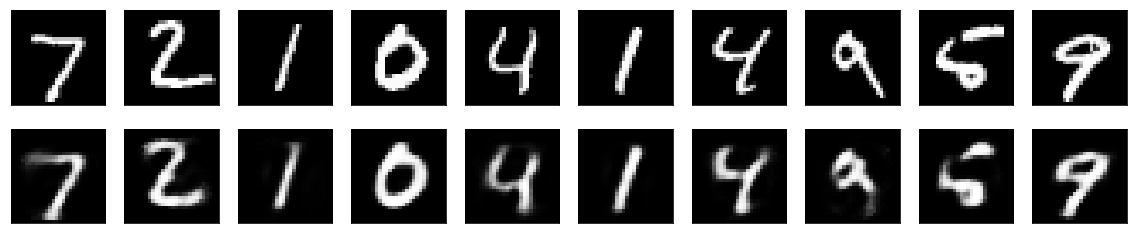

In [10]:
# use matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

n = 10 # how many digits we will display
plt.figure(figsize = (20,4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()# use matplotlib.pyplot as plt
